In [1]:
import os
import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from datetime import datetime

from tqdm import tqdm
import json
from sklearn.preprocessing import normalize

In [2]:
from code import model
from code.data import Dataset
from code import epoch
from code import evaluation

In [3]:
root = os.getcwd()
batch = 8
forecast = 30
samples = 5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = "cpu"

# date_time = datetime.strftime(datetime.now(), "%Y-%m-%d_%H-%M")
date_time = "2021-04-09_14-35"

# Model

In [4]:
def load_checkpoint(filepath, device):

    encoder = model.Extractor(in_channels=1, out_channels=1)
    decoder = model.Decoder(classes=forecast, num_layers=5) # forcast 30 days

    predictor = model.Model(encoder=encoder, decoder=decoder).to(device)
    
        
    if os.path.exists(filepath):
        checkpoint = torch.load(filepath)
        predictor.load_state_dict(checkpoint['model_stat'])
        optimizer = torch.optim.Adam(predictor.parameters(), lr=1e-4)
        optimizer.load_state_dict(checkpoint['optimizer_stat'])
        
        print("Find pretrain.")

    else:
        optimizer = torch.optim.Adam(predictor.parameters(), lr=1e-4)
        
        print("New model and optimizer")
        
    return predictor, optimizer

In [5]:
dataset = Dataset(path=os.path.join(root, "training.csv"))

In [6]:
predictor, optimizer = load_checkpoint(
                        filepath=os.path.join(root, "results", date_time, "{}.pth".format(date_time)),
                        device=device)

Find pretrain.


In [7]:
trainloader = DataLoader(dataset, batch_size=batch, shuffle=False, num_workers=2)

In [7]:
train_info = {
       "kendal": []
}

kendal_min = 1
for e in range(5000):
    
    train_loss = epoch.train_epoch(predictor, optimizer, trainloader, device)
    pr, gt = epoch.test_epoch(predictor, dataset, device)
    
    kendal = evaluation.normalised_kendall_tau_distance(gt, pr)
    train_info["kendal"].append(kendal)
    
    print("Epoch: {}, loss = {:.5f}, kendal = {:.5f}".format(e+1, train_loss, kendal))
    
    if kendal < kendal_min:
        checkpoint = {
            'model_stat': predictor.state_dict(),
            'optimizer_stat': optimizer.state_dict(),
        }

        torch.save(checkpoint, os.path.join(root, "results", date_time, "{}.pth".format(date_time)))
        kendal_min = kendal
    with open(os.path.join(root, "results", date_time, "{}.json".format(date_time)), 'w') as f:
        json.dump(train_info, f)

145it [00:03, 38.56it/s]
1158it [00:11, 96.82it/s] 


Epoch: 1, loss = 0.69559, kendal = 0.20118


145it [00:03, 46.45it/s]
1158it [00:09, 128.02it/s]


Epoch: 2, loss = 0.69502, kendal = 0.20892


145it [00:03, 42.46it/s]
1158it [00:11, 98.36it/s] 


Epoch: 3, loss = 0.69399, kendal = 0.22284


145it [00:03, 41.30it/s]
1158it [00:10, 115.23it/s]

Epoch: 4, loss = 0.69314, kendal = 0.20666



145it [00:03, 46.27it/s]
1158it [00:08, 135.21it/s]

Epoch: 5, loss = 0.69228, kendal = 0.20803



145it [00:03, 43.88it/s]
1158it [00:12, 95.55it/s]

Epoch: 6, loss = 0.69142, kendal = 0.23190



145it [00:03, 40.87it/s]
1158it [00:10, 108.91it/s]


Epoch: 7, loss = 0.69045, kendal = 0.24346


145it [00:03, 43.29it/s]
1158it [00:12, 92.15it/s]

Epoch: 8, loss = 0.69015, kendal = 0.24265



145it [00:03, 36.48it/s]
1158it [00:12, 91.63it/s] 

Epoch: 9, loss = 0.68930, kendal = 0.24411



145it [00:03, 40.86it/s]
1158it [00:11, 101.22it/s]


Epoch: 10, loss = 0.68853, kendal = 0.24229


145it [00:03, 37.12it/s]
1158it [00:13, 87.75it/s]

Epoch: 11, loss = 0.68822, kendal = 0.24179



145it [00:03, 39.15it/s]
1158it [00:09, 118.18it/s]

Epoch: 12, loss = 0.68793, kendal = 0.24243



145it [00:03, 40.12it/s]
1158it [00:13, 88.16it/s]


Epoch: 13, loss = 0.68728, kendal = 0.23427


145it [00:03, 36.86it/s]
1158it [00:11, 96.73it/s] 

Epoch: 14, loss = 0.68701, kendal = 0.23835



145it [00:06, 21.16it/s]
1158it [00:25, 44.63it/s]

Epoch: 15, loss = 0.68609, kendal = 0.24163



145it [00:06, 21.13it/s]
1158it [00:28, 40.04it/s]

Epoch: 16, loss = 0.68554, kendal = 0.21180



145it [00:08, 17.83it/s]
1158it [00:35, 32.82it/s]


Epoch: 17, loss = 0.68533, kendal = 0.21351


145it [00:12, 11.75it/s]
1158it [00:40, 28.30it/s]

Epoch: 18, loss = 0.68457, kendal = 0.20332



145it [00:12, 11.56it/s]
1158it [00:41, 27.88it/s]

Epoch: 19, loss = 0.68405, kendal = 0.21262



145it [00:12, 11.22it/s]
1158it [00:41, 28.15it/s]

Epoch: 20, loss = 0.68347, kendal = 0.20523



145it [00:12, 11.38it/s]
1158it [00:40, 28.35it/s]

Epoch: 21, loss = 0.68294, kendal = 0.21043



145it [00:12, 11.38it/s]
1158it [00:41, 27.62it/s]

Epoch: 22, loss = 0.68250, kendal = 0.20469



145it [00:12, 11.56it/s]
1158it [00:40, 28.33it/s]

Epoch: 23, loss = 0.68177, kendal = 0.20477



145it [00:10, 13.60it/s]
1158it [00:42, 27.23it/s]

Epoch: 24, loss = 0.68154, kendal = 0.21031



145it [00:12, 11.64it/s]
1158it [00:40, 28.40it/s]

Epoch: 25, loss = 0.68045, kendal = 0.21047



145it [00:10, 13.46it/s]
1158it [00:42, 27.26it/s]

Epoch: 26, loss = 0.67985, kendal = 0.21061



145it [00:12, 11.16it/s]
1158it [00:40, 28.28it/s]

Epoch: 27, loss = 0.67983, kendal = 0.21966



145it [00:10, 13.75it/s]
1158it [00:41, 27.93it/s]


Epoch: 28, loss = 0.67888, kendal = 0.20884


145it [00:13, 10.70it/s]
1158it [00:41, 28.12it/s]


Epoch: 29, loss = 0.67878, kendal = 0.21146


145it [00:10, 13.65it/s]
1158it [00:41, 28.00it/s]

Epoch: 30, loss = 0.67831, kendal = 0.21326



145it [00:13, 10.65it/s]
1158it [00:42, 27.48it/s]

Epoch: 31, loss = 0.67728, kendal = 0.21046



145it [00:10, 13.74it/s]
1158it [00:40, 28.70it/s]


Epoch: 32, loss = 0.67678, kendal = 0.21074


145it [00:12, 11.52it/s]
1158it [00:42, 27.00it/s]

Epoch: 33, loss = 0.67668, kendal = 0.20799



145it [00:10, 13.52it/s]
1158it [00:40, 28.55it/s]

Epoch: 34, loss = 0.67589, kendal = 0.21606



145it [00:12, 11.77it/s]
1158it [00:42, 27.28it/s]


Epoch: 35, loss = 0.67575, kendal = 0.21258


145it [00:11, 12.28it/s]
1158it [00:40, 28.37it/s]


Epoch: 36, loss = 0.67521, kendal = 0.20812


145it [00:11, 12.10it/s]
1158it [00:41, 27.75it/s]

Epoch: 37, loss = 0.67488, kendal = 0.21904



145it [00:13, 11.03it/s]
1158it [00:40, 28.91it/s]


Epoch: 38, loss = 0.67465, kendal = 0.21355


145it [00:11, 12.58it/s]
1158it [00:40, 28.54it/s]


Epoch: 39, loss = 0.67348, kendal = 0.21445


145it [00:13, 11.07it/s]
1158it [00:41, 28.13it/s]

Epoch: 40, loss = 0.67229, kendal = 0.21149



145it [00:11, 12.71it/s]
1158it [00:40, 28.45it/s]

Epoch: 41, loss = 0.67313, kendal = 0.20301



145it [00:10, 13.59it/s]
1158it [00:42, 27.02it/s]


Epoch: 42, loss = 0.67241, kendal = 0.20701


145it [00:11, 12.89it/s]
1158it [00:40, 28.24it/s]

Epoch: 43, loss = 0.67108, kendal = 0.20705



145it [00:10, 13.62it/s]
1158it [00:42, 27.29it/s]


Epoch: 44, loss = 0.67125, kendal = 0.22233


145it [00:12, 11.63it/s]
1158it [00:40, 28.48it/s]

Epoch: 45, loss = 0.66974, kendal = 0.20844



145it [00:10, 13.58it/s]
1158it [00:41, 28.00it/s]

Epoch: 46, loss = 0.66904, kendal = 0.21277



145it [00:13, 10.68it/s]
1158it [00:41, 28.03it/s]

Epoch: 47, loss = 0.66818, kendal = 0.21622



145it [00:10, 13.73it/s]
1158it [00:40, 28.91it/s]


Epoch: 48, loss = 0.66757, kendal = 0.21756


145it [00:12, 11.16it/s]
1158it [00:42, 27.35it/s]


Epoch: 49, loss = 0.66663, kendal = 0.23656


145it [00:10, 13.67it/s]
1158it [00:40, 28.80it/s]


Epoch: 50, loss = 0.66545, kendal = 0.23790


145it [00:11, 12.40it/s]
1158it [00:42, 27.02it/s]

Epoch: 51, loss = 0.66415, kendal = 0.24138



145it [00:10, 13.51it/s]
1158it [00:40, 28.62it/s]


Epoch: 52, loss = 0.66375, kendal = 0.25645


145it [00:11, 12.68it/s]
1158it [00:42, 27.27it/s]

Epoch: 53, loss = 0.66243, kendal = 0.27048



145it [00:12, 11.43it/s]
1158it [00:39, 29.23it/s]


Epoch: 54, loss = 0.66193, kendal = 0.26874


145it [00:11, 13.09it/s]
1158it [00:40, 28.25it/s]

Epoch: 55, loss = 0.66125, kendal = 0.27483



145it [00:13, 11.07it/s]
1158it [00:41, 28.16it/s]

Epoch: 56, loss = 0.66031, kendal = 0.29830



145it [00:11, 13.18it/s]
1158it [00:40, 28.33it/s]


Epoch: 57, loss = 0.65907, kendal = 0.29658


145it [00:11, 13.04it/s]
1158it [00:42, 27.34it/s]


Epoch: 58, loss = 0.65883, kendal = 0.29213


145it [00:11, 13.14it/s]
1158it [00:40, 28.40it/s]

Epoch: 59, loss = 0.65803, kendal = 0.28223



145it [00:10, 13.55it/s]
1158it [00:42, 27.04it/s]


Epoch: 60, loss = 0.65921, kendal = 0.23002


145it [00:11, 12.80it/s]
1158it [00:40, 28.36it/s]

Epoch: 61, loss = 0.65768, kendal = 0.30044



145it [00:10, 13.55it/s]
1158it [00:42, 27.48it/s]

Epoch: 62, loss = 0.65998, kendal = 0.24178



145it [00:13, 10.86it/s]
1158it [00:41, 28.17it/s]

Epoch: 63, loss = 0.65896, kendal = 0.24364



145it [00:10, 13.73it/s]
1158it [00:41, 28.21it/s]

Epoch: 64, loss = 0.65686, kendal = 0.25299



145it [00:12, 11.18it/s]
1158it [00:41, 27.73it/s]

Epoch: 65, loss = 0.65698, kendal = 0.24874



145it [00:10, 13.66it/s]
1158it [00:40, 28.60it/s]

Epoch: 66, loss = 0.65639, kendal = 0.26455



145it [00:11, 12.70it/s]
1158it [00:42, 26.97it/s]

Epoch: 67, loss = 0.65692, kendal = 0.24025



145it [00:10, 13.67it/s]
1158it [00:40, 28.77it/s]

Epoch: 68, loss = 0.65666, kendal = 0.23413



145it [00:11, 12.97it/s]
1158it [00:42, 27.35it/s]


Epoch: 69, loss = 0.65345, kendal = 0.22594


145it [00:11, 12.68it/s]
1158it [00:39, 29.36it/s]


Epoch: 70, loss = 0.65393, kendal = 0.23052


145it [00:11, 12.98it/s]
1158it [00:41, 28.09it/s]


Epoch: 71, loss = 0.65322, kendal = 0.22724


145it [00:13, 10.79it/s]
1158it [00:41, 28.16it/s]

Epoch: 72, loss = 0.65504, kendal = 0.21930



145it [00:10, 13.27it/s]
1158it [00:40, 28.38it/s]

Epoch: 73, loss = 0.65635, kendal = 0.29698



145it [00:12, 11.29it/s]
1158it [00:41, 28.10it/s]

Epoch: 74, loss = 0.65221, kendal = 0.26349



145it [00:10, 13.31it/s]
1158it [00:40, 28.31it/s]

Epoch: 75, loss = 0.64757, kendal = 0.24199



145it [00:10, 13.56it/s]
1158it [00:42, 26.93it/s]

Epoch: 76, loss = 0.64445, kendal = 0.24889



145it [00:11, 13.15it/s]
1158it [00:40, 28.43it/s]


Epoch: 77, loss = 0.64286, kendal = 0.24081


145it [00:10, 13.66it/s]
1158it [00:42, 27.32it/s]

Epoch: 78, loss = 0.66206, kendal = 0.27899



145it [00:12, 11.37it/s]
1158it [00:40, 28.39it/s]

Epoch: 79, loss = 0.65790, kendal = 0.26591



145it [00:10, 13.64it/s]
1158it [00:40, 28.40it/s]

Epoch: 80, loss = 0.65121, kendal = 0.26672



145it [00:13, 10.77it/s]
1158it [00:41, 27.80it/s]

Epoch: 81, loss = 0.64938, kendal = 0.22816



145it [00:10, 13.60it/s]
1158it [00:40, 28.73it/s]

Epoch: 82, loss = 0.65270, kendal = 0.26330



145it [00:12, 11.61it/s]
1158it [00:42, 27.21it/s]

Epoch: 83, loss = 0.65691, kendal = 0.26379



145it [00:10, 13.66it/s]
1158it [00:39, 29.16it/s]

Epoch: 84, loss = 0.65235, kendal = 0.22632



145it [00:11, 12.43it/s]
1158it [00:42, 26.96it/s]

Epoch: 85, loss = 0.64753, kendal = 0.22485



145it [00:10, 13.61it/s]
1158it [00:40, 28.80it/s]

Epoch: 86, loss = 0.64041, kendal = 0.21521



145it [00:11, 12.65it/s]
1158it [00:41, 27.58it/s]


Epoch: 87, loss = 0.63765, kendal = 0.21877


145it [00:12, 11.99it/s]
1158it [00:41, 27.81it/s]

Epoch: 88, loss = 0.65081, kendal = 0.27880



145it [00:11, 13.15it/s]
1158it [00:40, 28.26it/s]

Epoch: 89, loss = 0.65110, kendal = 0.24848



145it [00:12, 11.49it/s]
1158it [00:40, 28.41it/s]


Epoch: 90, loss = 0.64030, kendal = 0.22567


145it [00:10, 13.22it/s]
1158it [00:40, 28.31it/s]


Epoch: 91, loss = 0.63350, kendal = 0.25316


145it [00:10, 13.81it/s]
1158it [00:42, 27.16it/s]

Epoch: 92, loss = 0.64720, kendal = 0.26091



145it [00:10, 13.18it/s]
1158it [00:40, 28.31it/s]

Epoch: 93, loss = 0.65096, kendal = 0.23025



145it [00:10, 13.67it/s]
1158it [00:43, 26.77it/s]


Epoch: 94, loss = 0.63403, kendal = 0.23088


145it [00:11, 12.22it/s]
1158it [00:40, 28.45it/s]

Epoch: 95, loss = 0.63703, kendal = 0.21434



145it [00:10, 13.64it/s]
1158it [00:41, 27.60it/s]


Epoch: 96, loss = 0.63355, kendal = 0.22237


145it [00:13, 10.67it/s]
1158it [00:41, 28.11it/s]

Epoch: 97, loss = 0.63358, kendal = 0.22097



145it [00:10, 13.73it/s]
1158it [00:40, 28.54it/s]

Epoch: 98, loss = 0.62809, kendal = 0.22899



145it [00:12, 11.34it/s]
1158it [00:42, 27.56it/s]

Epoch: 99, loss = 0.64378, kendal = 0.28274



145it [00:10, 13.45it/s]
1158it [00:40, 28.49it/s]


Epoch: 100, loss = 0.64660, kendal = 0.21340


145it [00:11, 12.41it/s]
1158it [00:43, 26.93it/s]

Epoch: 101, loss = 0.63058, kendal = 0.22310



145it [00:10, 13.53it/s]
1158it [00:39, 29.27it/s]

Epoch: 102, loss = 0.62584, kendal = 0.22157



145it [00:11, 12.55it/s]
1158it [00:42, 27.33it/s]

Epoch: 103, loss = 0.62092, kendal = 0.23373



145it [00:11, 12.13it/s]
1158it [00:39, 29.05it/s]

Epoch: 104, loss = 0.61920, kendal = 0.22820



145it [00:11, 12.79it/s]
1158it [00:41, 27.98it/s]

Epoch: 105, loss = 0.64387, kendal = 0.27680



145it [00:13, 10.82it/s]
1158it [00:40, 28.37it/s]


Epoch: 106, loss = 0.63905, kendal = 0.29202


145it [00:11, 13.16it/s]
1158it [00:40, 28.35it/s]

Epoch: 107, loss = 0.61859, kendal = 0.24425



145it [00:11, 12.11it/s]
1158it [00:42, 27.28it/s]

Epoch: 108, loss = 0.61605, kendal = 0.23558



145it [00:10, 13.38it/s]
1158it [00:40, 28.28it/s]

Epoch: 109, loss = 0.61309, kendal = 0.23097



145it [00:10, 13.57it/s]
1158it [00:43, 26.86it/s]

Epoch: 110, loss = 0.61753, kendal = 0.25654



145it [00:11, 13.15it/s]
1158it [00:40, 28.28it/s]

Epoch: 111, loss = 0.61381, kendal = 0.25929



145it [00:10, 13.58it/s]
1158it [00:42, 27.25it/s]

Epoch: 112, loss = 0.61102, kendal = 0.28893



145it [00:12, 11.22it/s]
1158it [00:40, 28.40it/s]

Epoch: 113, loss = 0.60863, kendal = 0.28739



145it [00:10, 13.71it/s]
1158it [00:41, 28.12it/s]


Epoch: 114, loss = 0.63810, kendal = 0.28267


145it [00:13, 11.03it/s]
1158it [00:41, 27.89it/s]

Epoch: 115, loss = 0.61121, kendal = 0.25674



145it [00:10, 13.54it/s]
1158it [00:40, 28.61it/s]


Epoch: 116, loss = 0.60834, kendal = 0.23339


145it [00:12, 11.32it/s]
1158it [00:42, 27.27it/s]

Epoch: 117, loss = 0.60824, kendal = 0.23925



145it [00:10, 13.49it/s]
1158it [00:40, 28.88it/s]

Epoch: 118, loss = 0.60971, kendal = 0.22967



145it [00:11, 12.64it/s]
1158it [00:42, 26.96it/s]

Epoch: 119, loss = 0.60427, kendal = 0.24279



145it [00:10, 13.73it/s]
1158it [00:39, 29.21it/s]

Epoch: 120, loss = 0.60354, kendal = 0.22138



145it [00:11, 12.62it/s]
1158it [00:41, 27.79it/s]

Epoch: 121, loss = 0.60098, kendal = 0.23407



145it [00:12, 11.20it/s]
1158it [00:39, 29.15it/s]

Epoch: 122, loss = 0.60070, kendal = 0.24517



145it [00:11, 12.90it/s]
1158it [00:40, 28.29it/s]

Epoch: 123, loss = 0.60000, kendal = 0.22042



145it [00:12, 11.39it/s]
1158it [00:41, 28.21it/s]

Epoch: 124, loss = 0.60167, kendal = 0.23674



145it [00:11, 13.14it/s]
1158it [00:40, 28.40it/s]

Epoch: 125, loss = 0.59788, kendal = 0.26835



145it [00:10, 13.66it/s]
1158it [00:42, 27.46it/s]

Epoch: 126, loss = 0.59462, kendal = 0.23479



145it [00:11, 12.81it/s]
1158it [00:40, 28.48it/s]

Epoch: 127, loss = 0.67225, kendal = 0.26869



145it [00:10, 13.51it/s]
1158it [00:42, 27.26it/s]


Epoch: 128, loss = 0.65481, kendal = 0.24326


145it [00:12, 11.97it/s]
1158it [00:40, 28.50it/s]

Epoch: 129, loss = 0.62196, kendal = 0.28099



145it [00:10, 13.52it/s]
1158it [00:41, 27.76it/s]

Epoch: 130, loss = 0.59937, kendal = 0.28243



145it [00:13, 11.07it/s]
1158it [00:40, 28.28it/s]

Epoch: 131, loss = 0.59365, kendal = 0.27986



145it [00:10, 13.64it/s]
1158it [00:40, 28.39it/s]

Epoch: 132, loss = 0.59268, kendal = 0.27794



145it [00:13, 10.90it/s]
1158it [00:42, 27.42it/s]

Epoch: 133, loss = 0.59293, kendal = 0.26276



145it [00:10, 13.63it/s]
1158it [00:39, 28.98it/s]


Epoch: 134, loss = 0.59128, kendal = 0.27183


145it [00:12, 11.86it/s]
1158it [00:43, 26.84it/s]

Epoch: 135, loss = 0.59360, kendal = 0.25149



145it [00:10, 13.60it/s]
1158it [00:40, 28.83it/s]

Epoch: 136, loss = 0.58972, kendal = 0.25611



145it [00:11, 12.26it/s]
1158it [00:42, 27.22it/s]


Epoch: 137, loss = 0.63009, kendal = 0.24015


145it [00:11, 12.63it/s]
1158it [00:40, 28.80it/s]


Epoch: 138, loss = 0.62045, kendal = 0.27459


145it [00:11, 12.37it/s]
1158it [00:41, 27.85it/s]


Epoch: 139, loss = 0.59320, kendal = 0.26044


145it [00:13, 10.58it/s]
1158it [00:40, 28.54it/s]


Epoch: 140, loss = 0.58941, kendal = 0.26677


145it [00:11, 12.88it/s]
1158it [00:40, 28.48it/s]

Epoch: 141, loss = 0.58619, kendal = 0.25075



145it [00:12, 11.35it/s]
1158it [00:41, 27.61it/s]


Epoch: 142, loss = 0.58556, kendal = 0.25943


145it [00:10, 13.30it/s]
1158it [00:40, 28.42it/s]

Epoch: 143, loss = 0.61264, kendal = 0.22343



145it [00:10, 13.71it/s]
1158it [00:42, 27.02it/s]

Epoch: 144, loss = 0.63526, kendal = 0.23047



145it [00:11, 13.03it/s]
1158it [00:40, 28.36it/s]

Epoch: 145, loss = 0.59846, kendal = 0.25148



145it [00:10, 13.58it/s]
1158it [00:42, 27.09it/s]


Epoch: 146, loss = 0.58689, kendal = 0.24835


145it [00:12, 11.76it/s]
1158it [00:41, 28.23it/s]

Epoch: 147, loss = 0.58565, kendal = 0.24483



145it [00:10, 13.67it/s]
1158it [00:40, 28.26it/s]

Epoch: 148, loss = 0.58157, kendal = 0.24543



145it [00:13, 10.67it/s]
1158it [00:41, 28.11it/s]

Epoch: 149, loss = 0.58637, kendal = 0.23922



145it [00:10, 13.62it/s]
1158it [00:40, 28.87it/s]

Epoch: 150, loss = 0.58190, kendal = 0.23650



145it [00:13, 11.05it/s]
1158it [00:42, 27.35it/s]


Epoch: 151, loss = 0.58534, kendal = 0.23009


145it [00:10, 13.65it/s]
1158it [00:40, 28.70it/s]


Epoch: 152, loss = 0.59040, kendal = 0.22499


145it [00:11, 12.31it/s]
1158it [00:42, 27.17it/s]

Epoch: 153, loss = 0.57997, kendal = 0.23201



145it [00:10, 13.54it/s]
1158it [00:39, 29.00it/s]


Epoch: 154, loss = 0.58320, kendal = 0.23165


145it [00:11, 12.33it/s]
1158it [00:42, 27.36it/s]

Epoch: 155, loss = 0.57835, kendal = 0.23044



145it [00:12, 11.72it/s]
1158it [00:39, 28.96it/s]

Epoch: 156, loss = 0.57803, kendal = 0.22372



145it [00:11, 12.77it/s]
1158it [00:41, 28.16it/s]


Epoch: 157, loss = 0.57707, kendal = 0.21832


145it [00:13, 10.65it/s]
1158it [00:40, 28.78it/s]


Epoch: 158, loss = 0.57775, kendal = 0.21920


145it [00:11, 13.11it/s]
1158it [00:40, 28.41it/s]

Epoch: 159, loss = 0.57016, kendal = 0.21679



145it [00:11, 12.60it/s]
1158it [00:41, 27.61it/s]


Epoch: 160, loss = 0.57370, kendal = 0.21853


145it [00:11, 13.16it/s]
1158it [00:40, 28.38it/s]


Epoch: 161, loss = 0.56871, kendal = 0.21379


145it [00:10, 13.65it/s]
1158it [00:42, 26.97it/s]

Epoch: 162, loss = 0.56932, kendal = 0.20553



145it [00:11, 12.75it/s]
1158it [00:40, 28.31it/s]

Epoch: 163, loss = 0.56562, kendal = 0.20838



145it [00:10, 13.56it/s]
1158it [00:42, 27.28it/s]

Epoch: 164, loss = 0.56577, kendal = 0.20524



145it [00:13, 10.86it/s]
1158it [00:40, 28.27it/s]

Epoch: 165, loss = 0.56612, kendal = 0.19822



145it [00:10, 13.73it/s]
1158it [00:41, 28.23it/s]

Epoch: 166, loss = 0.57157, kendal = 0.22869



145it [00:13, 10.86it/s]
1158it [00:41, 27.81it/s]


Epoch: 167, loss = 0.57505, kendal = 0.20076


145it [00:10, 13.74it/s]
1158it [00:40, 28.73it/s]


Epoch: 168, loss = 0.56748, kendal = 0.19832


145it [00:12, 11.25it/s]
1158it [00:42, 27.36it/s]

Epoch: 169, loss = 0.56106, kendal = 0.21464



145it [00:10, 13.60it/s]
1158it [00:40, 28.81it/s]

Epoch: 170, loss = 0.55871, kendal = 0.21280



145it [00:11, 12.26it/s]
1158it [00:42, 26.99it/s]

Epoch: 171, loss = 0.56202, kendal = 0.21620



145it [00:10, 13.61it/s]
1158it [00:40, 28.90it/s]


Epoch: 172, loss = 0.64104, kendal = 0.22584


145it [00:11, 12.47it/s]
1158it [00:41, 27.58it/s]


Epoch: 173, loss = 0.58553, kendal = 0.21556


145it [00:12, 11.49it/s]
1158it [00:40, 28.57it/s]

Epoch: 174, loss = 0.56424, kendal = 0.21952



145it [00:11, 12.78it/s]
1158it [00:40, 28.26it/s]

Epoch: 175, loss = 0.55341, kendal = 0.21606



145it [00:13, 11.05it/s]
1158it [00:40, 28.51it/s]

Epoch: 176, loss = 0.55127, kendal = 0.21355



145it [00:10, 13.26it/s]
1158it [00:40, 28.35it/s]

Epoch: 177, loss = 0.56954, kendal = 0.21937



145it [00:10, 13.66it/s]
1158it [00:41, 27.61it/s]

Epoch: 178, loss = 0.56312, kendal = 0.22562



145it [00:11, 12.78it/s]
1158it [00:40, 28.40it/s]

Epoch: 179, loss = 0.56280, kendal = 0.23837



145it [00:10, 13.58it/s]
1158it [00:42, 27.16it/s]

Epoch: 180, loss = 0.55383, kendal = 0.23965



145it [00:12, 12.08it/s]
1158it [00:40, 28.55it/s]

Epoch: 181, loss = 0.54845, kendal = 0.24326



145it [00:10, 13.65it/s]
1158it [00:42, 27.50it/s]


Epoch: 182, loss = 0.54467, kendal = 0.24279


145it [00:13, 10.99it/s]
1158it [00:40, 28.26it/s]

Epoch: 183, loss = 0.54269, kendal = 0.23486



145it [00:10, 13.66it/s]
1158it [00:40, 28.60it/s]


Epoch: 184, loss = 0.54504, kendal = 0.24400


145it [00:13, 10.87it/s]
1158it [00:42, 27.55it/s]

Epoch: 185, loss = 0.54330, kendal = 0.24707



145it [00:10, 13.60it/s]
1158it [00:40, 28.70it/s]


Epoch: 186, loss = 0.54136, kendal = 0.25020


145it [00:12, 11.60it/s]
1158it [00:42, 27.07it/s]

Epoch: 187, loss = 0.53987, kendal = 0.24438



145it [00:10, 13.59it/s]
1158it [00:40, 28.70it/s]

Epoch: 188, loss = 0.54770, kendal = 0.26550



145it [00:12, 12.02it/s]
1158it [00:42, 27.24it/s]


Epoch: 189, loss = 0.54360, kendal = 0.24111


145it [00:11, 12.87it/s]
1158it [00:40, 28.75it/s]


Epoch: 190, loss = 0.54518, kendal = 0.29593


145it [00:11, 12.29it/s]
1158it [00:41, 27.94it/s]

Epoch: 191, loss = 0.58538, kendal = 0.25389



145it [00:12, 11.22it/s]
1158it [00:40, 28.57it/s]


Epoch: 192, loss = 0.60096, kendal = 0.28333


145it [00:11, 12.65it/s]
1158it [00:40, 28.28it/s]

Epoch: 193, loss = 0.57072, kendal = 0.23340



145it [00:12, 11.48it/s]
1158it [00:40, 28.48it/s]

Epoch: 194, loss = 0.55790, kendal = 0.30904



145it [00:11, 12.77it/s]
1158it [00:40, 28.24it/s]


Epoch: 195, loss = 0.54138, kendal = 0.25718


145it [00:10, 13.68it/s]
1158it [00:42, 27.06it/s]

Epoch: 196, loss = 0.53963, kendal = 0.28700



145it [00:11, 12.49it/s]
1158it [00:40, 28.44it/s]

Epoch: 197, loss = 0.53833, kendal = 0.31113



145it [00:10, 13.46it/s]
1158it [00:42, 27.26it/s]


Epoch: 198, loss = 0.53353, kendal = 0.30832


145it [00:12, 11.65it/s]
1158it [00:40, 28.42it/s]


Epoch: 199, loss = 0.54804, kendal = 0.24889


145it [00:10, 13.67it/s]
1158it [00:41, 27.90it/s]

Epoch: 200, loss = 0.53859, kendal = 0.26154



145it [00:13, 10.87it/s]
1158it [00:41, 28.22it/s]

Epoch: 201, loss = 0.58485, kendal = 0.21009



145it [00:10, 13.61it/s]
1158it [00:40, 28.84it/s]


Epoch: 202, loss = 0.55966, kendal = 0.22320


145it [00:13, 10.88it/s]
1158it [00:41, 27.59it/s]


Epoch: 203, loss = 0.54571, kendal = 0.24602


145it [00:10, 13.61it/s]
1158it [00:40, 28.70it/s]

Epoch: 204, loss = 0.53507, kendal = 0.26940



145it [00:12, 11.65it/s]
1158it [00:42, 27.33it/s]

Epoch: 205, loss = 0.53688, kendal = 0.21000



145it [00:10, 13.66it/s]
1158it [00:40, 28.52it/s]

Epoch: 206, loss = 0.52987, kendal = 0.19586



145it [00:12, 11.84it/s]
1158it [00:42, 27.23it/s]

Epoch: 207, loss = 0.52589, kendal = 0.24849



145it [00:11, 12.18it/s]
1158it [00:40, 28.59it/s]


Epoch: 208, loss = 0.52427, kendal = 0.24543


145it [00:11, 12.30it/s]
1158it [00:41, 27.85it/s]

Epoch: 209, loss = 0.52545, kendal = 0.24777



145it [00:13, 10.95it/s]
1158it [00:40, 28.51it/s]

Epoch: 210, loss = 0.52084, kendal = 0.24952



145it [00:11, 12.90it/s]
1158it [00:40, 28.30it/s]

Epoch: 211, loss = 0.51989, kendal = 0.24393



145it [00:12, 11.24it/s]
1158it [00:41, 28.02it/s]

Epoch: 212, loss = 0.55535, kendal = 0.31867



145it [00:11, 13.04it/s]
1158it [00:41, 28.19it/s]


Epoch: 213, loss = 0.53906, kendal = 0.31718


145it [00:10, 13.74it/s]
1158it [00:42, 27.04it/s]

Epoch: 214, loss = 0.56726, kendal = 0.29129



145it [00:11, 12.89it/s]
1158it [00:40, 28.40it/s]


Epoch: 215, loss = 0.54534, kendal = 0.32798


145it [00:10, 13.71it/s]
1158it [00:42, 27.34it/s]

Epoch: 216, loss = 0.52882, kendal = 0.33454



145it [00:12, 11.65it/s]
1158it [00:40, 28.35it/s]

Epoch: 217, loss = 0.53310, kendal = 0.33498



145it [00:10, 13.64it/s]
1158it [00:41, 27.86it/s]

Epoch: 218, loss = 0.53267, kendal = 0.30138



145it [00:13, 11.04it/s]
1158it [00:41, 27.95it/s]

Epoch: 219, loss = 0.51776, kendal = 0.30470



145it [00:10, 13.74it/s]
1158it [00:40, 28.39it/s]

Epoch: 220, loss = 0.51946, kendal = 0.24442



145it [00:13, 10.99it/s]
1158it [00:41, 27.72it/s]


Epoch: 221, loss = 0.54106, kendal = 0.29336


145it [00:10, 13.58it/s]
1158it [00:40, 28.60it/s]

Epoch: 222, loss = 0.52188, kendal = 0.32647



145it [00:11, 12.23it/s]
1158it [00:42, 27.25it/s]

Epoch: 223, loss = 0.51196, kendal = 0.32582



145it [00:10, 13.59it/s]
1158it [00:40, 28.75it/s]

Epoch: 224, loss = 0.51138, kendal = 0.32275



145it [00:11, 12.27it/s]
1158it [00:42, 27.41it/s]


Epoch: 225, loss = 0.51156, kendal = 0.29078


145it [00:12, 11.19it/s]
1158it [00:40, 28.89it/s]


Epoch: 226, loss = 0.51652, kendal = 0.30804


145it [00:11, 12.68it/s]
1158it [00:41, 28.03it/s]


Epoch: 227, loss = 0.52220, kendal = 0.32498


145it [00:13, 11.08it/s]
1158it [00:40, 28.37it/s]

Epoch: 228, loss = 0.51044, kendal = 0.31813



145it [00:11, 12.92it/s]
1158it [00:40, 28.36it/s]

Epoch: 229, loss = 0.54807, kendal = 0.31238



145it [00:11, 12.20it/s]
1158it [00:41, 27.83it/s]

Epoch: 230, loss = 0.54302, kendal = 0.31643



145it [00:11, 12.97it/s]
1158it [00:40, 28.27it/s]

Epoch: 231, loss = 0.53352, kendal = 0.31313



145it [00:10, 13.62it/s]
1158it [00:43, 26.87it/s]

Epoch: 232, loss = 0.51218, kendal = 0.30500



145it [00:11, 12.68it/s]
1158it [00:40, 28.38it/s]

Epoch: 233, loss = 0.50552, kendal = 0.30019



145it [00:10, 13.67it/s]
1158it [00:41, 27.63it/s]


Epoch: 234, loss = 0.53777, kendal = 0.28329


145it [00:13, 10.78it/s]
1158it [00:40, 28.37it/s]

Epoch: 235, loss = 0.51240, kendal = 0.29398



145it [00:10, 13.63it/s]
1158it [00:41, 28.04it/s]

Epoch: 236, loss = 0.50498, kendal = 0.28629



145it [00:13, 10.86it/s]
1158it [00:41, 28.08it/s]


Epoch: 237, loss = 0.50192, kendal = 0.26027


145it [00:10, 13.55it/s]
1158it [00:40, 28.68it/s]

Epoch: 238, loss = 0.55561, kendal = 0.24291



145it [00:12, 11.38it/s]
1158it [00:42, 27.46it/s]

Epoch: 239, loss = 0.51478, kendal = 0.27666



145it [00:10, 13.53it/s]
1158it [00:40, 28.77it/s]

Epoch: 240, loss = 0.50853, kendal = 0.25194



145it [00:12, 11.96it/s]
1158it [00:42, 27.20it/s]


Epoch: 241, loss = 0.49352, kendal = 0.25821


145it [00:10, 13.64it/s]
1158it [00:40, 28.83it/s]

Epoch: 242, loss = 0.49473, kendal = 0.26716



145it [00:11, 12.11it/s]
1158it [00:41, 27.77it/s]

Epoch: 243, loss = 0.49349, kendal = 0.25875



145it [00:12, 11.54it/s]
1158it [00:40, 28.94it/s]

Epoch: 244, loss = 0.49820, kendal = 0.25913



145it [00:11, 12.37it/s]
1158it [00:40, 28.42it/s]

Epoch: 245, loss = 0.50001, kendal = 0.28202



145it [00:12, 11.18it/s]
1158it [00:40, 28.71it/s]


Epoch: 246, loss = 0.49160, kendal = 0.27593


145it [00:11, 12.57it/s]
1158it [00:40, 28.50it/s]

Epoch: 247, loss = 0.49101, kendal = 0.24255



145it [00:10, 13.22it/s]
1158it [00:42, 27.46it/s]


Epoch: 248, loss = 0.49179, kendal = 0.25932


145it [00:11, 12.56it/s]
1158it [00:40, 28.28it/s]

Epoch: 249, loss = 0.48643, kendal = 0.21097



145it [00:10, 13.54it/s]
1158it [00:42, 27.02it/s]

Epoch: 250, loss = 0.49577, kendal = 0.20767



145it [00:11, 12.15it/s]
1158it [00:40, 28.51it/s]


Epoch: 251, loss = 0.53255, kendal = 0.26347


145it [00:10, 13.53it/s]
1158it [00:41, 27.71it/s]

Epoch: 252, loss = 0.50509, kendal = 0.24835



145it [00:13, 11.01it/s]
1158it [00:41, 28.14it/s]


Epoch: 253, loss = 0.50093, kendal = 0.20848


145it [00:10, 13.71it/s]
1158it [00:40, 28.38it/s]

Epoch: 254, loss = 0.48622, kendal = 0.20440



145it [00:13, 11.05it/s]
1158it [00:41, 27.65it/s]


Epoch: 255, loss = 0.48133, kendal = 0.20713


145it [00:10, 13.67it/s]
1158it [00:40, 28.63it/s]


Epoch: 256, loss = 0.47859, kendal = 0.21004


145it [00:13, 11.14it/s]
1158it [00:42, 27.48it/s]


Epoch: 257, loss = 0.47989, kendal = 0.20303


145it [00:10, 13.62it/s]
1158it [00:40, 28.78it/s]

Epoch: 258, loss = 0.48234, kendal = 0.24794



145it [00:12, 11.71it/s]
1158it [00:42, 27.02it/s]

Epoch: 259, loss = 0.47970, kendal = 0.21719



145it [00:10, 13.74it/s]
1158it [00:42, 27.37it/s]


Epoch: 260, loss = 0.48788, kendal = 0.26141


145it [00:11, 12.41it/s]
1158it [00:41, 27.79it/s]


Epoch: 261, loss = 0.59111, kendal = 0.32486


145it [00:13, 10.81it/s]
1158it [00:39, 28.97it/s]


Epoch: 262, loss = 0.55954, kendal = 0.25607


145it [00:11, 12.77it/s]
1158it [00:40, 28.27it/s]


Epoch: 263, loss = 0.51466, kendal = 0.22911


145it [00:13, 11.01it/s]
1158it [00:40, 28.40it/s]

Epoch: 264, loss = 0.48710, kendal = 0.24339



145it [00:11, 12.99it/s]
1158it [00:40, 28.77it/s]

Epoch: 265, loss = 0.47460, kendal = 0.21693



145it [00:10, 13.39it/s]
1158it [00:42, 27.42it/s]

Epoch: 266, loss = 0.47113, kendal = 0.21039



145it [00:11, 12.83it/s]
1158it [00:40, 28.34it/s]


Epoch: 267, loss = 0.46922, kendal = 0.22339


145it [00:10, 13.56it/s]
1158it [00:42, 27.10it/s]


Epoch: 268, loss = 0.46754, kendal = 0.23191


145it [00:11, 12.25it/s]
1158it [00:40, 28.25it/s]

Epoch: 269, loss = 0.46563, kendal = 0.23322



145it [00:10, 13.79it/s]
1158it [00:41, 27.57it/s]

Epoch: 270, loss = 0.46474, kendal = 0.22506



145it [00:13, 10.78it/s]
1158it [00:40, 28.28it/s]

Epoch: 271, loss = 0.48012, kendal = 0.18852



145it [00:10, 13.61it/s]
1158it [00:41, 28.03it/s]

Epoch: 272, loss = 0.49175, kendal = 0.22048



145it [00:13, 10.71it/s]
1158it [00:41, 28.06it/s]

Epoch: 273, loss = 0.51398, kendal = 0.25709



145it [00:10, 13.54it/s]
1158it [00:40, 28.95it/s]

Epoch: 274, loss = 0.49525, kendal = 0.26315



145it [00:12, 11.37it/s]
1158it [00:41, 27.62it/s]

Epoch: 275, loss = 0.47983, kendal = 0.20085



145it [00:10, 13.67it/s]
1158it [00:40, 28.68it/s]

Epoch: 276, loss = 0.48443, kendal = 0.20962



145it [00:12, 11.82it/s]
1158it [00:42, 27.22it/s]

Epoch: 277, loss = 0.47330, kendal = 0.22146



145it [00:10, 13.64it/s]
1158it [00:40, 28.80it/s]


Epoch: 278, loss = 0.47098, kendal = 0.19074


145it [00:12, 11.99it/s]
1158it [00:41, 27.75it/s]

Epoch: 279, loss = 0.46778, kendal = 0.20885



145it [00:13, 10.60it/s]
1158it [00:40, 28.76it/s]

Epoch: 280, loss = 0.47604, kendal = 0.22045



145it [00:11, 12.47it/s]
1158it [00:40, 28.35it/s]

Epoch: 281, loss = 0.46432, kendal = 0.19830



145it [00:12, 11.36it/s]
1158it [00:40, 28.39it/s]


Epoch: 282, loss = 0.46061, kendal = 0.20155


145it [00:11, 12.64it/s]
1158it [00:40, 28.29it/s]

Epoch: 283, loss = 0.45920, kendal = 0.19095



145it [00:10, 13.59it/s]
1158it [00:42, 27.49it/s]

Epoch: 284, loss = 0.46388, kendal = 0.20511



145it [00:11, 12.56it/s]
1158it [00:40, 28.28it/s]


Epoch: 285, loss = 0.46498, kendal = 0.19617


145it [00:10, 13.75it/s]
1158it [00:42, 27.06it/s]

Epoch: 286, loss = 0.47383, kendal = 0.20196



145it [00:12, 12.05it/s]
1158it [00:40, 28.38it/s]

Epoch: 287, loss = 0.46203, kendal = 0.19904



145it [00:10, 13.62it/s]
1158it [00:42, 27.52it/s]

Epoch: 288, loss = 0.47140, kendal = 0.20367



145it [00:13, 10.70it/s]
1158it [00:40, 28.32it/s]

Epoch: 289, loss = 0.54510, kendal = 0.23177



145it [00:10, 13.84it/s]
1158it [00:40, 28.32it/s]

Epoch: 290, loss = 0.57879, kendal = 0.20295



145it [00:13, 10.72it/s]
1158it [00:41, 27.77it/s]

Epoch: 291, loss = 0.55747, kendal = 0.25587



145it [00:10, 13.49it/s]
1158it [00:40, 28.77it/s]


Epoch: 292, loss = 0.51170, kendal = 0.24738


145it [00:12, 11.46it/s]
1158it [00:42, 27.39it/s]

Epoch: 293, loss = 0.51675, kendal = 0.20372



145it [00:10, 13.63it/s]
1158it [00:39, 29.12it/s]


Epoch: 294, loss = 0.54399, kendal = 0.20450


145it [00:12, 11.73it/s]
1158it [00:42, 27.32it/s]


Epoch: 295, loss = 0.47776, kendal = 0.19405


145it [00:10, 13.53it/s]
1158it [00:40, 28.60it/s]


Epoch: 296, loss = 0.46815, kendal = 0.18584


145it [00:12, 11.86it/s]
1158it [00:41, 27.60it/s]

Epoch: 297, loss = 0.46369, kendal = 0.18996



145it [00:13, 10.62it/s]
1158it [00:40, 28.81it/s]


Epoch: 298, loss = 0.45783, kendal = 0.19047


145it [00:11, 12.39it/s]
1158it [00:41, 28.23it/s]


Epoch: 299, loss = 0.45342, kendal = 0.19449


145it [00:12, 11.43it/s]
1158it [00:41, 27.59it/s]


Epoch: 300, loss = 0.45399, kendal = 0.18886


145it [00:11, 12.90it/s]
1158it [00:40, 28.45it/s]


Epoch: 301, loss = 0.44972, kendal = 0.19291


145it [00:11, 12.89it/s]
1158it [00:42, 27.30it/s]

Epoch: 302, loss = 0.44984, kendal = 0.19403



145it [00:11, 12.79it/s]
1158it [00:40, 28.41it/s]


Epoch: 303, loss = 0.45059, kendal = 0.19547


145it [00:10, 13.59it/s]
1158it [00:43, 26.85it/s]


Epoch: 304, loss = 0.45132, kendal = 0.19732


145it [00:11, 12.51it/s]
1158it [00:41, 28.21it/s]


Epoch: 305, loss = 0.44719, kendal = 0.20000


145it [00:10, 13.64it/s]
1158it [00:42, 27.41it/s]

Epoch: 306, loss = 0.45132, kendal = 0.19614



145it [00:13, 10.67it/s]
1158it [00:40, 28.46it/s]


Epoch: 307, loss = 0.45158, kendal = 0.19371


145it [00:10, 13.58it/s]
1158it [00:40, 28.30it/s]

Epoch: 308, loss = 0.46711, kendal = 0.20289



145it [00:13, 11.15it/s]
1158it [00:41, 27.80it/s]

Epoch: 309, loss = 0.49027, kendal = 0.19628



145it [00:10, 13.43it/s]
1158it [00:40, 28.56it/s]

Epoch: 310, loss = 0.47487, kendal = 0.20739



145it [00:12, 11.73it/s]
1158it [00:42, 27.26it/s]

Epoch: 311, loss = 0.47445, kendal = 0.21086



145it [00:10, 13.77it/s]
1158it [00:40, 28.92it/s]

Epoch: 312, loss = 0.46590, kendal = 0.19933



145it [00:12, 11.99it/s]
1158it [00:42, 27.17it/s]


Epoch: 313, loss = 0.46626, kendal = 0.19521


145it [00:10, 13.65it/s]
1158it [00:40, 28.72it/s]

Epoch: 314, loss = 0.46589, kendal = 0.20078



145it [00:12, 12.03it/s]
1158it [00:41, 27.58it/s]

Epoch: 315, loss = 0.45513, kendal = 0.21046



145it [00:13, 11.07it/s]
1158it [00:41, 27.98it/s]

Epoch: 316, loss = 0.45213, kendal = 0.19758



145it [00:11, 12.60it/s]
1158it [00:41, 28.21it/s]

Epoch: 317, loss = 0.45118, kendal = 0.19839



145it [00:12, 11.98it/s]
1158it [00:40, 28.26it/s]

Epoch: 318, loss = 0.44848, kendal = 0.19809



145it [00:11, 12.71it/s]
1158it [00:40, 28.35it/s]

Epoch: 319, loss = 0.44715, kendal = 0.19605



145it [00:10, 13.32it/s]
1158it [00:42, 27.45it/s]

Epoch: 320, loss = 0.44359, kendal = 0.19956



145it [00:11, 12.67it/s]
1158it [00:40, 28.25it/s]

Epoch: 321, loss = 0.44645, kendal = 0.20337



145it [00:10, 13.71it/s]
1158it [00:42, 27.24it/s]

Epoch: 322, loss = 0.44700, kendal = 0.19158



145it [00:11, 12.12it/s]
1158it [00:40, 28.45it/s]

Epoch: 323, loss = 0.53999, kendal = 0.19674



145it [00:10, 13.67it/s]
1158it [00:41, 27.79it/s]

Epoch: 324, loss = 0.50831, kendal = 0.19256



145it [00:13, 10.70it/s]
1158it [00:40, 28.41it/s]

Epoch: 325, loss = 0.46151, kendal = 0.19364



145it [00:10, 13.60it/s]
1158it [00:40, 28.58it/s]

Epoch: 326, loss = 0.44853, kendal = 0.19450



145it [00:13, 10.90it/s]
1158it [00:41, 27.78it/s]

Epoch: 327, loss = 0.44451, kendal = 0.19696



145it [00:10, 13.62it/s]
1158it [00:40, 28.76it/s]

Epoch: 328, loss = 0.45097, kendal = 0.19922



145it [00:12, 11.31it/s]
1158it [00:42, 27.45it/s]

Epoch: 329, loss = 0.50827, kendal = 0.27232



145it [00:10, 13.66it/s]
1158it [00:40, 28.70it/s]

Epoch: 330, loss = 0.50932, kendal = 0.21253



145it [00:12, 11.62it/s]
1158it [00:42, 27.22it/s]

Epoch: 331, loss = 0.46725, kendal = 0.24246



145it [00:11, 13.18it/s]
1158it [00:40, 28.71it/s]

Epoch: 332, loss = 0.46138, kendal = 0.20058



145it [00:12, 11.75it/s]
1158it [00:41, 27.78it/s]

Epoch: 333, loss = 0.49022, kendal = 0.24120



145it [00:12, 11.21it/s]
1158it [00:40, 28.85it/s]

Epoch: 334, loss = 0.50292, kendal = 0.22189



145it [00:11, 12.27it/s]
1158it [00:40, 28.25it/s]


Epoch: 335, loss = 0.58487, kendal = 0.25664


145it [00:12, 11.55it/s]
1158it [00:41, 27.99it/s]

Epoch: 336, loss = 0.49382, kendal = 0.24163



145it [00:11, 12.66it/s]
1158it [00:40, 28.26it/s]

Epoch: 337, loss = 0.46301, kendal = 0.21998



145it [00:10, 13.76it/s]
1158it [00:42, 27.04it/s]


Epoch: 338, loss = 0.46359, kendal = 0.20730


145it [00:11, 12.52it/s]
1158it [00:40, 28.37it/s]

Epoch: 339, loss = 0.60873, kendal = 0.24425



145it [00:10, 13.57it/s]
1158it [00:42, 27.15it/s]


Epoch: 340, loss = 0.48923, kendal = 0.22278


145it [00:12, 12.02it/s]
1158it [00:40, 28.31it/s]


Epoch: 341, loss = 0.45779, kendal = 0.25737


145it [00:10, 13.96it/s]
1158it [00:41, 27.61it/s]

Epoch: 342, loss = 0.44437, kendal = 0.26630



145it [00:13, 11.15it/s]
1158it [00:41, 28.22it/s]

Epoch: 343, loss = 0.47368, kendal = 0.25804



145it [00:10, 13.47it/s]
1158it [00:40, 28.73it/s]


Epoch: 344, loss = 0.46192, kendal = 0.24362


145it [00:13, 10.70it/s]
1158it [00:41, 28.10it/s]

Epoch: 345, loss = 0.45758, kendal = 0.24754



145it [00:10, 13.65it/s]
1158it [00:40, 28.63it/s]

Epoch: 346, loss = 0.44859, kendal = 0.24384



145it [00:12, 11.40it/s]
1158it [00:42, 27.14it/s]

Epoch: 347, loss = 0.44169, kendal = 0.26834



145it [00:10, 13.62it/s]
1158it [00:40, 28.70it/s]

Epoch: 348, loss = 0.43950, kendal = 0.26149



145it [00:12, 11.62it/s]
1158it [00:42, 27.47it/s]

Epoch: 349, loss = 0.43907, kendal = 0.25598



145it [00:11, 13.00it/s]
1158it [00:42, 27.40it/s]


Epoch: 350, loss = 0.43857, kendal = 0.26228


145it [00:11, 12.10it/s]
1158it [00:41, 27.86it/s]

Epoch: 351, loss = 0.43934, kendal = 0.25922



145it [00:12, 11.58it/s]
1158it [00:40, 28.76it/s]

Epoch: 352, loss = 0.44034, kendal = 0.24195



145it [00:11, 12.41it/s]
1158it [00:40, 28.26it/s]


Epoch: 353, loss = 0.43896, kendal = 0.26057


145it [00:13, 10.92it/s]
1158it [00:41, 28.16it/s]


Epoch: 354, loss = 0.44068, kendal = 0.26913


145it [00:11, 12.81it/s]
1158it [00:40, 28.47it/s]

Epoch: 355, loss = 0.43740, kendal = 0.24799



145it [00:10, 13.53it/s]
1158it [00:42, 27.18it/s]

Epoch: 356, loss = 0.44042, kendal = 0.25651



145it [00:11, 12.73it/s]
1158it [00:40, 28.42it/s]


Epoch: 357, loss = 0.44360, kendal = 0.19917


145it [00:10, 13.75it/s]
1158it [00:42, 26.96it/s]


Epoch: 358, loss = 0.45472, kendal = 0.25672


145it [00:11, 12.33it/s]
1158it [00:40, 28.29it/s]

Epoch: 359, loss = 0.47859, kendal = 0.19185



145it [00:10, 13.74it/s]
1158it [00:41, 27.64it/s]

Epoch: 360, loss = 0.50548, kendal = 0.23794



145it [00:13, 10.76it/s]
1158it [00:40, 28.33it/s]

Epoch: 361, loss = 0.45284, kendal = 0.24425



145it [00:10, 13.72it/s]
1158it [00:40, 28.68it/s]


Epoch: 362, loss = 0.44122, kendal = 0.25231


145it [00:13, 10.85it/s]
1158it [00:42, 27.51it/s]

Epoch: 363, loss = 0.43570, kendal = 0.24985



145it [00:10, 13.66it/s]
1158it [00:40, 28.71it/s]

Epoch: 364, loss = 0.43421, kendal = 0.25963



145it [00:12, 11.58it/s]
1158it [00:42, 27.15it/s]

Epoch: 365, loss = 0.43382, kendal = 0.27039



145it [00:10, 13.63it/s]
1158it [00:40, 28.71it/s]

Epoch: 366, loss = 0.43437, kendal = 0.26770



145it [00:12, 11.84it/s]
1158it [00:42, 27.11it/s]

Epoch: 367, loss = 0.43874, kendal = 0.26371



145it [00:11, 13.03it/s]
1158it [00:40, 28.56it/s]

Epoch: 368, loss = 0.43828, kendal = 0.27801



145it [00:11, 12.15it/s]
1158it [00:41, 27.66it/s]


Epoch: 369, loss = 0.46365, kendal = 0.24795


145it [00:12, 11.21it/s]
1158it [00:40, 28.89it/s]

Epoch: 370, loss = 0.53211, kendal = 0.20323



145it [00:11, 12.43it/s]
1158it [00:40, 28.44it/s]

Epoch: 371, loss = 0.46491, kendal = 0.23288



145it [00:12, 11.56it/s]
1158it [00:41, 27.96it/s]

Epoch: 372, loss = 0.50034, kendal = 0.19734



145it [00:11, 12.69it/s]
1158it [00:40, 28.39it/s]


Epoch: 373, loss = 0.45212, kendal = 0.19843


145it [00:10, 13.68it/s]
1158it [00:42, 27.30it/s]


Epoch: 374, loss = 0.43572, kendal = 0.19442


145it [00:11, 12.78it/s]
1158it [00:40, 28.31it/s]

Epoch: 375, loss = 0.43300, kendal = 0.19682



145it [00:10, 13.73it/s]
1158it [00:42, 27.23it/s]

Epoch: 376, loss = 0.43125, kendal = 0.19494



145it [00:12, 11.76it/s]
1158it [00:40, 28.26it/s]

Epoch: 377, loss = 0.42923, kendal = 0.19440



145it [00:10, 13.54it/s]
1158it [00:41, 27.85it/s]

Epoch: 378, loss = 0.42936, kendal = 0.20268



145it [00:13, 11.03it/s]
1158it [00:40, 28.27it/s]

Epoch: 379, loss = 0.42673, kendal = 0.19890



145it [00:10, 13.63it/s]
1158it [00:40, 28.55it/s]

Epoch: 380, loss = 0.42798, kendal = 0.20126



145it [00:13, 10.79it/s]
1158it [00:41, 27.60it/s]

Epoch: 381, loss = 0.42721, kendal = 0.19910



145it [00:10, 13.72it/s]
1158it [00:40, 28.63it/s]

Epoch: 382, loss = 0.42837, kendal = 0.19838



145it [00:12, 11.71it/s]
1158it [00:42, 27.23it/s]

Epoch: 383, loss = 0.43639, kendal = 0.19789



145it [00:10, 13.56it/s]
1158it [00:39, 29.17it/s]

Epoch: 384, loss = 0.43500, kendal = 0.19897



145it [00:12, 11.74it/s]
1158it [00:42, 27.16it/s]

Epoch: 385, loss = 0.43565, kendal = 0.20807



145it [00:11, 12.31it/s]
1158it [00:40, 28.70it/s]

Epoch: 386, loss = 0.44089, kendal = 0.20073



145it [00:11, 12.13it/s]
1158it [00:41, 28.00it/s]

Epoch: 387, loss = 0.43688, kendal = 0.18888



145it [00:12, 11.18it/s]
1158it [00:40, 28.57it/s]

Epoch: 388, loss = 0.51881, kendal = 0.21322



145it [00:11, 12.43it/s]
1158it [00:40, 28.37it/s]


Epoch: 389, loss = 0.46332, kendal = 0.19193


145it [00:11, 12.10it/s]
1158it [00:40, 28.31it/s]

Epoch: 390, loss = 0.45744, kendal = 0.20379



145it [00:11, 12.55it/s]
1158it [00:40, 28.27it/s]

Epoch: 391, loss = 0.44189, kendal = 0.24567



145it [00:10, 13.72it/s]
1158it [00:43, 26.88it/s]

Epoch: 392, loss = 0.50807, kendal = 0.21845



145it [00:11, 12.43it/s]
1158it [00:40, 28.46it/s]


Epoch: 393, loss = 0.49421, kendal = 0.21422


145it [00:10, 13.73it/s]
1158it [00:42, 27.16it/s]

Epoch: 394, loss = 0.50265, kendal = 0.19867



145it [00:12, 11.61it/s]
1158it [00:40, 28.27it/s]

Epoch: 395, loss = 0.44858, kendal = 0.21597



145it [00:10, 13.59it/s]
1158it [00:41, 27.91it/s]

Epoch: 396, loss = 0.43752, kendal = 0.19460



145it [00:13, 10.78it/s]
1158it [00:41, 28.00it/s]


Epoch: 397, loss = 0.43024, kendal = 0.19954


145it [00:10, 13.67it/s]
1158it [00:41, 27.81it/s]

Epoch: 398, loss = 0.42740, kendal = 0.19466



145it [00:13, 10.63it/s]
1158it [00:41, 27.57it/s]

Epoch: 399, loss = 0.49799, kendal = 0.19922



145it [00:10, 13.68it/s]
1158it [00:40, 28.77it/s]

Epoch: 400, loss = 0.47903, kendal = 0.24424



145it [00:12, 12.08it/s]
1158it [00:42, 27.35it/s]

Epoch: 401, loss = 0.46641, kendal = 0.20374



145it [00:10, 13.50it/s]
1158it [00:40, 28.58it/s]

Epoch: 402, loss = 0.44220, kendal = 0.21577



145it [00:11, 12.22it/s]
1158it [00:42, 27.45it/s]


Epoch: 403, loss = 0.43394, kendal = 0.25466


145it [00:12, 11.98it/s]
1158it [00:39, 28.99it/s]

Epoch: 404, loss = 0.43128, kendal = 0.25468



145it [00:11, 12.44it/s]
1158it [00:41, 27.81it/s]

Epoch: 405, loss = 0.43279, kendal = 0.24490



145it [00:13, 10.77it/s]
1158it [00:40, 28.72it/s]

Epoch: 406, loss = 0.42735, kendal = 0.24957



145it [00:11, 12.94it/s]
1158it [00:40, 28.39it/s]

Epoch: 407, loss = 0.42333, kendal = 0.25295



145it [00:12, 12.00it/s]
1158it [00:41, 27.90it/s]

Epoch: 408, loss = 0.45692, kendal = 0.23413



145it [00:11, 13.05it/s]
1158it [00:40, 28.42it/s]

Epoch: 409, loss = 0.55596, kendal = 0.22407



145it [00:10, 13.70it/s]
1158it [00:42, 27.22it/s]


Epoch: 410, loss = 0.45759, kendal = 0.21126


145it [00:11, 12.69it/s]
1158it [00:40, 28.34it/s]

Epoch: 411, loss = 0.44780, kendal = 0.22769



145it [00:10, 13.67it/s]
1158it [00:42, 27.24it/s]

Epoch: 412, loss = 0.43186, kendal = 0.26766



145it [00:12, 11.31it/s]
1158it [00:40, 28.36it/s]


Epoch: 413, loss = 0.42846, kendal = 0.25591


145it [00:10, 13.66it/s]
1158it [00:41, 27.70it/s]

Epoch: 414, loss = 0.42631, kendal = 0.24098



145it [00:13, 10.53it/s]
1158it [00:41, 27.93it/s]

Epoch: 415, loss = 0.42561, kendal = 0.25409



145it [00:10, 13.66it/s]
1158it [00:40, 28.66it/s]


Epoch: 416, loss = 0.47068, kendal = 0.20350


145it [00:12, 11.23it/s]
1158it [00:41, 27.67it/s]

Epoch: 417, loss = 0.53327, kendal = 0.25143



145it [00:10, 13.66it/s]
1158it [00:40, 28.76it/s]

Epoch: 418, loss = 0.45377, kendal = 0.21703



145it [00:12, 11.90it/s]
1158it [00:42, 27.06it/s]

Epoch: 419, loss = 0.43211, kendal = 0.23270



145it [00:10, 13.51it/s]
1158it [00:39, 29.01it/s]

Epoch: 420, loss = 0.42853, kendal = 0.23427



145it [00:12, 12.06it/s]
1158it [00:42, 27.30it/s]

Epoch: 421, loss = 0.42324, kendal = 0.19812



145it [00:12, 11.80it/s]
1158it [00:40, 28.61it/s]

Epoch: 422, loss = 0.42405, kendal = 0.19590



145it [00:11, 12.51it/s]
1158it [00:41, 28.00it/s]

Epoch: 423, loss = 0.42221, kendal = 0.19851



145it [00:12, 11.20it/s]
1158it [00:40, 28.50it/s]


Epoch: 424, loss = 0.42279, kendal = 0.19956


145it [00:11, 12.81it/s]
1158it [00:40, 28.31it/s]

Epoch: 425, loss = 0.41912, kendal = 0.20352



145it [00:11, 12.48it/s]
1158it [00:41, 27.91it/s]


Epoch: 426, loss = 0.42273, kendal = 0.23784


145it [00:11, 12.71it/s]
1158it [00:40, 28.36it/s]


Epoch: 427, loss = 0.42672, kendal = 0.19003


145it [00:10, 13.66it/s]
1158it [00:42, 27.09it/s]


Epoch: 428, loss = 0.42229, kendal = 0.19997


145it [00:11, 12.57it/s]
1158it [00:40, 28.34it/s]

Epoch: 429, loss = 0.44423, kendal = 0.19799



145it [00:10, 13.66it/s]
1158it [00:42, 27.34it/s]

Epoch: 430, loss = 0.43532, kendal = 0.19903



145it [00:12, 11.30it/s]
1158it [00:40, 28.48it/s]

Epoch: 431, loss = 0.42958, kendal = 0.19413



145it [00:10, 13.33it/s]
1158it [00:41, 28.16it/s]

Epoch: 432, loss = 0.44587, kendal = 0.21162



145it [00:13, 10.82it/s]
1158it [00:41, 28.04it/s]

Epoch: 433, loss = 0.42927, kendal = 0.23492



145it [00:10, 13.65it/s]
1158it [00:40, 28.75it/s]

Epoch: 434, loss = 0.42726, kendal = 0.19865



145it [00:13, 10.73it/s]
1158it [00:41, 27.66it/s]


Epoch: 435, loss = 0.42567, kendal = 0.19733


145it [00:10, 13.47it/s]
1158it [00:40, 28.72it/s]


Epoch: 436, loss = 0.43425, kendal = 0.20328


145it [00:12, 11.58it/s]
1158it [00:42, 27.27it/s]

Epoch: 437, loss = 0.46613, kendal = 0.19740



145it [00:10, 13.62it/s]
1158it [00:40, 28.88it/s]


Epoch: 438, loss = 0.44332, kendal = 0.19915


145it [00:12, 11.60it/s]
1158it [00:42, 27.26it/s]

Epoch: 439, loss = 0.43179, kendal = 0.19867



145it [00:11, 12.16it/s]
1158it [00:40, 28.57it/s]

Epoch: 440, loss = 0.42250, kendal = 0.19781



145it [00:12, 12.02it/s]
1158it [00:41, 27.86it/s]


Epoch: 441, loss = 0.45155, kendal = 0.18777


145it [00:12, 11.23it/s]
1158it [00:40, 28.41it/s]


Epoch: 442, loss = 0.61923, kendal = 0.19694


145it [00:11, 12.53it/s]
1158it [00:40, 28.36it/s]

Epoch: 443, loss = 0.53065, kendal = 0.22301



145it [00:11, 12.29it/s]
1158it [00:41, 27.97it/s]


Epoch: 444, loss = 0.46275, kendal = 0.21185


145it [00:11, 12.65it/s]
1158it [00:40, 28.38it/s]

Epoch: 445, loss = 0.43626, kendal = 0.21407



145it [00:10, 13.65it/s]
1158it [00:42, 27.04it/s]

Epoch: 446, loss = 0.42863, kendal = 0.21631



145it [00:11, 12.56it/s]
1158it [00:40, 28.34it/s]

Epoch: 447, loss = 0.42021, kendal = 0.19668



145it [00:10, 13.74it/s]
1158it [00:42, 27.39it/s]

Epoch: 448, loss = 0.41885, kendal = 0.19565



145it [00:12, 11.26it/s]
1158it [00:40, 28.37it/s]


Epoch: 449, loss = 0.41989, kendal = 0.20773


145it [00:10, 13.58it/s]
1158it [00:41, 27.98it/s]

Epoch: 450, loss = 0.41567, kendal = 0.19709



145it [00:13, 11.08it/s]
1158it [00:41, 27.97it/s]

Epoch: 451, loss = 0.42214, kendal = 0.20163



145it [00:10, 13.63it/s]
1158it [00:40, 28.82it/s]

Epoch: 452, loss = 0.41629, kendal = 0.20904



145it [00:13, 11.01it/s]
1158it [00:42, 27.48it/s]


Epoch: 453, loss = 0.41750, kendal = 0.19483


145it [00:10, 13.76it/s]
1158it [00:40, 28.57it/s]


Epoch: 454, loss = 0.42096, kendal = 0.19360


145it [00:12, 11.60it/s]
1158it [00:42, 27.44it/s]

Epoch: 455, loss = 0.42743, kendal = 0.20764



145it [00:10, 13.57it/s]
1158it [00:40, 28.82it/s]

Epoch: 456, loss = 0.42018, kendal = 0.19697



145it [00:12, 11.79it/s]
1158it [00:42, 27.40it/s]

Epoch: 457, loss = 0.41907, kendal = 0.20034



145it [00:12, 11.40it/s]
1158it [00:39, 28.97it/s]


Epoch: 458, loss = 0.42469, kendal = 0.20254


145it [00:11, 12.14it/s]
1158it [00:41, 28.19it/s]

Epoch: 459, loss = 0.42302, kendal = 0.20355



145it [00:12, 11.32it/s]
1158it [00:40, 28.26it/s]


Epoch: 460, loss = 0.42103, kendal = 0.21420


145it [00:11, 12.41it/s]
1158it [00:40, 28.49it/s]

Epoch: 461, loss = 0.42102, kendal = 0.20365



145it [00:11, 12.37it/s]
1158it [00:42, 27.54it/s]


Epoch: 462, loss = 0.41768, kendal = 0.20680


145it [00:11, 12.64it/s]
1158it [00:40, 28.35it/s]


Epoch: 463, loss = 0.41705, kendal = 0.20062


145it [00:10, 13.63it/s]
1158it [00:42, 26.94it/s]

Epoch: 464, loss = 0.41818, kendal = 0.19741



145it [00:11, 12.47it/s]
1158it [00:40, 28.52it/s]

Epoch: 465, loss = 0.41847, kendal = 0.21002



145it [00:10, 13.75it/s]
1158it [00:42, 27.38it/s]

Epoch: 466, loss = 0.42216, kendal = 0.21163



145it [00:13, 11.13it/s]
1158it [00:40, 28.39it/s]


Epoch: 467, loss = 0.42351, kendal = 0.21122


145it [00:10, 13.74it/s]
1158it [00:41, 27.87it/s]

Epoch: 468, loss = 0.43002, kendal = 0.20561



145it [00:13, 10.69it/s]
1158it [00:41, 28.20it/s]

Epoch: 469, loss = 0.44067, kendal = 0.21724



145it [00:10, 13.62it/s]
1158it [00:40, 28.73it/s]

Epoch: 470, loss = 0.42255, kendal = 0.20261



145it [00:13, 10.93it/s]
1158it [00:42, 27.37it/s]

Epoch: 471, loss = 0.42748, kendal = 0.24679



145it [00:10, 13.72it/s]
1158it [00:40, 28.84it/s]


Epoch: 472, loss = 0.44006, kendal = 0.20267


145it [00:12, 11.68it/s]
1158it [00:42, 27.21it/s]

Epoch: 473, loss = 0.41738, kendal = 0.19810



145it [00:10, 13.57it/s]
1158it [00:40, 28.67it/s]

Epoch: 474, loss = 0.42475, kendal = 0.19420



145it [00:12, 11.83it/s]
1158it [00:42, 27.54it/s]

Epoch: 475, loss = 0.42641, kendal = 0.21088



145it [00:12, 11.50it/s]
1158it [00:40, 28.63it/s]

Epoch: 476, loss = 0.42813, kendal = 0.21340



145it [00:11, 12.33it/s]
1158it [00:41, 28.07it/s]

Epoch: 477, loss = 0.42281, kendal = 0.20315



145it [00:13, 11.09it/s]
1158it [00:40, 28.41it/s]

Epoch: 478, loss = 0.41651, kendal = 0.19590



145it [00:11, 12.66it/s]
1158it [00:40, 28.58it/s]

Epoch: 479, loss = 0.41198, kendal = 0.20021



145it [00:11, 12.36it/s]
1158it [00:41, 27.85it/s]


Epoch: 480, loss = 0.41389, kendal = 0.20618


145it [00:11, 12.72it/s]
1158it [00:40, 28.26it/s]

Epoch: 481, loss = 0.41151, kendal = 0.21625



145it [00:10, 13.63it/s]
1158it [00:43, 26.88it/s]

Epoch: 482, loss = 0.40659, kendal = 0.20710



145it [00:11, 12.55it/s]
1158it [00:40, 28.36it/s]

Epoch: 483, loss = 0.40480, kendal = 0.20890



145it [00:10, 13.62it/s]
1158it [00:42, 27.32it/s]


Epoch: 484, loss = 0.40652, kendal = 0.20769


145it [00:12, 11.16it/s]
1158it [00:40, 28.32it/s]


Epoch: 485, loss = 0.40926, kendal = 0.21286


145it [00:10, 13.68it/s]
1158it [00:41, 28.00it/s]

Epoch: 486, loss = 0.41142, kendal = 0.22048



145it [00:13, 10.93it/s]
1158it [00:41, 27.85it/s]

Epoch: 487, loss = 0.41351, kendal = 0.20430



145it [00:10, 13.68it/s]
1158it [00:40, 28.58it/s]


Epoch: 488, loss = 0.42583, kendal = 0.19862


145it [00:12, 11.19it/s]
1158it [00:42, 27.42it/s]

Epoch: 489, loss = 0.42759, kendal = 0.20454



145it [00:10, 13.72it/s]
1158it [00:40, 28.90it/s]

Epoch: 490, loss = 0.42990, kendal = 0.20804



145it [00:12, 11.65it/s]
1158it [00:42, 27.33it/s]

Epoch: 491, loss = 0.40985, kendal = 0.20702



145it [00:10, 13.61it/s]
1158it [00:40, 28.70it/s]

Epoch: 492, loss = 0.40888, kendal = 0.20531



145it [00:12, 11.83it/s]
1158it [00:42, 27.56it/s]

Epoch: 493, loss = 0.40657, kendal = 0.20182



145it [00:12, 11.69it/s]
1158it [00:40, 28.79it/s]

Epoch: 494, loss = 0.40332, kendal = 0.20262



145it [00:11, 12.17it/s]
1158it [00:41, 28.00it/s]

Epoch: 495, loss = 0.40917, kendal = 0.20154



145it [00:13, 10.76it/s]
1158it [00:40, 28.60it/s]

Epoch: 496, loss = 0.41948, kendal = 0.20806



145it [00:11, 12.56it/s]
1158it [00:40, 28.39it/s]

Epoch: 497, loss = 0.44583, kendal = 0.20175



145it [00:11, 12.53it/s]
1158it [00:41, 27.85it/s]

Epoch: 498, loss = 0.42921, kendal = 0.21349



145it [00:11, 12.56it/s]
1158it [00:40, 28.35it/s]


Epoch: 499, loss = 0.42387, kendal = 0.19287


145it [00:10, 13.67it/s]
1158it [00:42, 26.98it/s]


Epoch: 500, loss = 0.41282, kendal = 0.20620


145it [00:11, 12.40it/s]
1158it [00:40, 28.69it/s]

Epoch: 501, loss = 0.40839, kendal = 0.22018



145it [00:10, 13.61it/s]
1158it [00:41, 27.69it/s]


Epoch: 502, loss = 0.40541, kendal = 0.19524


145it [00:13, 11.11it/s]
1158it [00:40, 28.40it/s]

Epoch: 503, loss = 0.40703, kendal = 0.21944



145it [00:10, 13.53it/s]
1158it [00:41, 28.12it/s]

Epoch: 504, loss = 0.40515, kendal = 0.19435



145it [00:13, 10.85it/s]
1158it [00:41, 28.00it/s]


Epoch: 505, loss = 0.40424, kendal = 0.19790


145it [00:10, 13.71it/s]
1158it [00:40, 28.70it/s]

Epoch: 506, loss = 0.43018, kendal = 0.19901



145it [00:13, 11.12it/s]
1158it [00:42, 27.43it/s]

Epoch: 507, loss = 0.42078, kendal = 0.19488



145it [00:10, 13.63it/s]
1158it [00:40, 28.77it/s]


Epoch: 508, loss = 0.40675, kendal = 0.19527


145it [00:12, 11.55it/s]
1158it [00:42, 27.42it/s]

Epoch: 509, loss = 0.41022, kendal = 0.19490



145it [00:10, 13.65it/s]
1158it [00:39, 28.95it/s]

Epoch: 510, loss = 0.40347, kendal = 0.20105



145it [00:12, 11.69it/s]
1158it [00:42, 27.43it/s]


Epoch: 511, loss = 0.40689, kendal = 0.19280


145it [00:13, 10.85it/s]
1158it [00:39, 28.99it/s]


Epoch: 512, loss = 0.40724, kendal = 0.19617


145it [00:11, 12.17it/s]
1158it [00:41, 28.10it/s]

Epoch: 513, loss = 0.40217, kendal = 0.19598



145it [00:13, 10.97it/s]
1158it [00:40, 28.65it/s]


Epoch: 514, loss = 0.40274, kendal = 0.19729


145it [00:11, 12.42it/s]
1158it [00:40, 28.30it/s]

Epoch: 515, loss = 0.40021, kendal = 0.19483



145it [00:11, 12.15it/s]
1158it [00:41, 27.58it/s]

Epoch: 516, loss = 0.40399, kendal = 0.20913



145it [00:11, 12.68it/s]
1158it [00:40, 28.43it/s]

Epoch: 517, loss = 0.40880, kendal = 0.19765



145it [00:10, 13.67it/s]
1158it [00:43, 26.83it/s]

Epoch: 518, loss = 0.40610, kendal = 0.20736



145it [00:11, 12.45it/s]
1158it [00:40, 28.42it/s]

Epoch: 519, loss = 0.40378, kendal = 0.20899



145it [00:10, 13.59it/s]
1158it [00:42, 27.41it/s]

Epoch: 520, loss = 0.40686, kendal = 0.20517



145it [00:13, 11.10it/s]
1158it [00:40, 28.35it/s]

Epoch: 521, loss = 0.41083, kendal = 0.20121



145it [00:10, 13.64it/s]
1158it [00:41, 27.88it/s]

Epoch: 522, loss = 0.42615, kendal = 0.21528



145it [00:13, 10.78it/s]
1158it [00:41, 27.83it/s]

Epoch: 523, loss = 0.43235, kendal = 0.21101



145it [00:10, 13.68it/s]
1158it [00:40, 28.69it/s]

Epoch: 524, loss = 0.43338, kendal = 0.19914



145it [00:13, 10.91it/s]
1158it [00:42, 27.39it/s]

Epoch: 525, loss = 0.41503, kendal = 0.18992



145it [00:10, 13.60it/s]
1158it [00:40, 28.56it/s]


Epoch: 526, loss = 0.41014, kendal = 0.19194


145it [00:12, 11.89it/s]
1158it [00:42, 27.46it/s]

Epoch: 527, loss = 0.40700, kendal = 0.19326



145it [00:10, 13.62it/s]
1158it [00:40, 28.90it/s]

Epoch: 528, loss = 0.40167, kendal = 0.19072



145it [00:12, 11.92it/s]
1158it [00:42, 27.42it/s]

Epoch: 529, loss = 0.40269, kendal = 0.19835



145it [00:12, 11.60it/s]
1158it [00:40, 28.80it/s]


Epoch: 530, loss = 0.40042, kendal = 0.19338


145it [00:11, 12.34it/s]
1158it [00:41, 28.09it/s]


Epoch: 531, loss = 0.39569, kendal = 0.19510


145it [00:13, 10.99it/s]
1158it [00:40, 28.38it/s]


Epoch: 532, loss = 0.39523, kendal = 0.18785


145it [00:11, 12.61it/s]
1158it [00:40, 28.29it/s]

Epoch: 533, loss = 0.39810, kendal = 0.18776



145it [00:11, 12.25it/s]
1158it [00:42, 27.54it/s]

Epoch: 534, loss = 0.39729, kendal = 0.20281



145it [00:11, 12.86it/s]
1158it [00:40, 28.59it/s]

Epoch: 535, loss = 0.40070, kendal = 0.20088



145it [00:10, 13.57it/s]
1158it [00:42, 26.99it/s]

Epoch: 536, loss = 0.40362, kendal = 0.19496



145it [00:11, 12.52it/s]
1158it [00:41, 28.24it/s]


Epoch: 537, loss = 0.41421, kendal = 0.19868


145it [00:10, 13.68it/s]
1158it [00:42, 27.33it/s]

Epoch: 538, loss = 0.40623, kendal = 0.19117



145it [00:12, 11.21it/s]
1158it [00:40, 28.38it/s]


Epoch: 539, loss = 0.39837, kendal = 0.19648


145it [00:10, 13.68it/s]
1158it [00:41, 28.00it/s]

Epoch: 540, loss = 0.39781, kendal = 0.18662



145it [00:13, 11.04it/s]
1158it [00:41, 28.19it/s]

Epoch: 541, loss = 0.39605, kendal = 0.19804



145it [00:10, 13.67it/s]
1158it [00:40, 28.74it/s]


Epoch: 542, loss = 0.39346, kendal = 0.20193


145it [00:12, 11.23it/s]
1158it [00:42, 27.47it/s]

Epoch: 543, loss = 0.39397, kendal = 0.20420



145it [00:10, 13.65it/s]
1158it [00:40, 28.27it/s]

Epoch: 544, loss = 0.39520, kendal = 0.20775



145it [00:12, 11.91it/s]
1158it [00:42, 27.32it/s]

Epoch: 545, loss = 0.40727, kendal = 0.20399



145it [00:10, 13.66it/s]
1158it [00:39, 28.99it/s]

Epoch: 546, loss = 0.42377, kendal = 0.20600



145it [00:12, 12.00it/s]
1158it [00:41, 27.58it/s]


Epoch: 547, loss = 0.41616, kendal = 0.19353


145it [00:12, 11.19it/s]
1158it [00:40, 28.75it/s]


Epoch: 548, loss = 0.41118, kendal = 0.22933


145it [00:11, 12.38it/s]
1158it [00:41, 28.13it/s]

Epoch: 549, loss = 0.39926, kendal = 0.19964



145it [00:13, 11.09it/s]
1158it [00:40, 28.33it/s]

Epoch: 550, loss = 0.39378, kendal = 0.19299



145it [00:11, 12.71it/s]
1158it [00:40, 28.30it/s]

Epoch: 551, loss = 0.39271, kendal = 0.19929



145it [00:11, 12.44it/s]
1158it [00:41, 27.67it/s]


Epoch: 552, loss = 0.39184, kendal = 0.19292


145it [00:11, 12.76it/s]
1158it [00:41, 28.24it/s]

Epoch: 553, loss = 0.38902, kendal = 0.19875



145it [00:10, 13.62it/s]
1158it [00:43, 26.85it/s]

Epoch: 554, loss = 0.39019, kendal = 0.20681



145it [00:11, 12.61it/s]
1158it [00:40, 28.30it/s]


Epoch: 555, loss = 0.39579, kendal = 0.20951


145it [00:10, 13.66it/s]
1158it [00:42, 27.32it/s]


Epoch: 556, loss = 0.40313, kendal = 0.20413


145it [00:13, 10.98it/s]
1158it [00:40, 28.63it/s]

Epoch: 557, loss = 0.41889, kendal = 0.22162



145it [00:10, 13.69it/s]
1158it [00:41, 28.19it/s]

Epoch: 558, loss = 0.45557, kendal = 0.20526



145it [00:13, 10.83it/s]
1158it [00:41, 27.87it/s]


Epoch: 559, loss = 0.46296, kendal = 0.20867


145it [00:10, 13.60it/s]
1158it [00:40, 28.75it/s]

Epoch: 560, loss = 0.43614, kendal = 0.20251



145it [00:13, 11.00it/s]
1158it [00:42, 27.41it/s]

Epoch: 561, loss = 0.41190, kendal = 0.19823



145it [00:10, 13.70it/s]
1158it [00:39, 29.03it/s]

Epoch: 562, loss = 0.39989, kendal = 0.19767



145it [00:12, 11.89it/s]
1158it [00:42, 27.07it/s]

Epoch: 563, loss = 0.39122, kendal = 0.19857



145it [00:10, 13.64it/s]
1158it [00:40, 28.60it/s]

Epoch: 564, loss = 0.38942, kendal = 0.20770



145it [00:12, 12.08it/s]
1158it [00:41, 27.63it/s]

Epoch: 565, loss = 0.38803, kendal = 0.19918



145it [00:12, 11.49it/s]
1158it [00:40, 28.87it/s]

Epoch: 566, loss = 0.39192, kendal = 0.19999



145it [00:11, 12.40it/s]
1158it [00:40, 28.26it/s]


Epoch: 567, loss = 0.39771, kendal = 0.19055


145it [00:12, 11.57it/s]
1158it [00:40, 28.25it/s]

Epoch: 568, loss = 0.39105, kendal = 0.19215



145it [00:11, 12.70it/s]
1158it [00:40, 28.39it/s]

Epoch: 569, loss = 0.39210, kendal = 0.19703



145it [00:11, 13.06it/s]
1158it [00:42, 27.37it/s]


Epoch: 570, loss = 0.38916, kendal = 0.19293


145it [00:11, 12.52it/s]
1158it [00:40, 28.37it/s]

Epoch: 571, loss = 0.38951, kendal = 0.19733



145it [00:10, 13.72it/s]
1158it [00:42, 27.12it/s]

Epoch: 572, loss = 0.39179, kendal = 0.19544



145it [00:11, 12.23it/s]
1158it [00:40, 28.43it/s]

Epoch: 573, loss = 0.38969, kendal = 0.19573



145it [00:10, 13.66it/s]
1158it [00:41, 27.59it/s]


Epoch: 574, loss = 0.39062, kendal = 0.20100


145it [00:13, 11.02it/s]
1158it [00:40, 28.29it/s]

Epoch: 575, loss = 0.39193, kendal = 0.20673



145it [00:10, 13.75it/s]
1158it [00:41, 28.06it/s]

Epoch: 576, loss = 0.39971, kendal = 0.19856



145it [00:13, 10.81it/s]
1158it [00:41, 27.84it/s]


Epoch: 577, loss = 0.40737, kendal = 0.20130


145it [00:10, 13.64it/s]
1158it [00:40, 28.67it/s]

Epoch: 578, loss = 0.39631, kendal = 0.20999



145it [00:12, 11.44it/s]
1158it [00:42, 27.13it/s]

Epoch: 579, loss = 0.39896, kendal = 0.19472



145it [00:10, 13.66it/s]
1158it [00:40, 28.53it/s]

Epoch: 580, loss = 0.42511, kendal = 0.20026



145it [00:11, 12.09it/s]
1158it [00:42, 27.40it/s]

Epoch: 581, loss = 0.43069, kendal = 0.19961



145it [00:10, 13.56it/s]
1158it [00:41, 27.87it/s]


Epoch: 582, loss = 0.40821, kendal = 0.19747


145it [00:11, 12.40it/s]
1158it [00:41, 27.86it/s]


Epoch: 583, loss = 0.39664, kendal = 0.18766


145it [00:12, 11.34it/s]
1158it [00:40, 28.90it/s]

Epoch: 584, loss = 0.38740, kendal = 0.19674



145it [00:11, 12.63it/s]
1158it [00:40, 28.52it/s]

Epoch: 585, loss = 0.38905, kendal = 0.19811



145it [00:12, 11.76it/s]
1158it [00:41, 28.17it/s]

Epoch: 586, loss = 0.38572, kendal = 0.19584



145it [00:11, 12.78it/s]
1158it [00:40, 28.43it/s]

Epoch: 587, loss = 0.38339, kendal = 0.19592



145it [00:10, 13.71it/s]
1158it [00:42, 27.18it/s]

Epoch: 588, loss = 0.38445, kendal = 0.19972



145it [00:11, 12.66it/s]
1158it [00:40, 28.31it/s]

Epoch: 589, loss = 0.38296, kendal = 0.19962



145it [00:10, 13.59it/s]
1158it [00:42, 27.08it/s]

Epoch: 590, loss = 0.38578, kendal = 0.19332



145it [00:11, 12.13it/s]
1158it [00:40, 28.26it/s]

Epoch: 591, loss = 0.38108, kendal = 0.19800



145it [00:10, 13.76it/s]
1158it [00:42, 27.47it/s]


Epoch: 592, loss = 0.38135, kendal = 0.19737


145it [00:13, 11.08it/s]
1158it [00:40, 28.37it/s]

Epoch: 593, loss = 0.38390, kendal = 0.19225



145it [00:10, 13.80it/s]
1158it [00:41, 28.14it/s]

Epoch: 594, loss = 0.39004, kendal = 0.19862



145it [00:13, 10.81it/s]
1158it [00:41, 27.87it/s]

Epoch: 595, loss = 0.40307, kendal = 0.19767



145it [00:10, 13.58it/s]
1158it [00:40, 28.75it/s]

Epoch: 596, loss = 0.40897, kendal = 0.19322



145it [00:12, 11.41it/s]
1158it [00:42, 27.17it/s]

Epoch: 597, loss = 0.40467, kendal = 0.19882



145it [00:10, 13.68it/s]
1158it [00:40, 28.54it/s]

Epoch: 598, loss = 0.40325, kendal = 0.19927



145it [00:12, 11.99it/s]
1158it [00:42, 27.25it/s]

Epoch: 599, loss = 0.39498, kendal = 0.19465



145it [00:10, 13.22it/s]
1158it [00:40, 28.60it/s]


Epoch: 600, loss = 0.39014, kendal = 0.20136


145it [00:11, 12.16it/s]
1158it [00:41, 27.86it/s]


Epoch: 601, loss = 0.38873, kendal = 0.19808


145it [00:12, 11.79it/s]
1158it [00:40, 28.72it/s]

Epoch: 602, loss = 0.38647, kendal = 0.19391



145it [00:11, 12.48it/s]
1158it [00:40, 28.44it/s]

Epoch: 603, loss = 0.39079, kendal = 0.20341



145it [00:12, 11.26it/s]
1158it [00:43, 26.84it/s]

Epoch: 604, loss = 0.39063, kendal = 0.19375



145it [00:10, 13.22it/s]
1158it [00:40, 28.39it/s]

Epoch: 605, loss = 0.38727, kendal = 0.20076



145it [00:10, 14.14it/s]
1158it [00:42, 27.24it/s]


Epoch: 606, loss = 0.38385, kendal = 0.19343


145it [00:11, 12.90it/s]
1158it [00:41, 28.23it/s]

Epoch: 607, loss = 0.38539, kendal = 0.20097



145it [00:10, 13.61it/s]
1158it [00:42, 27.24it/s]


Epoch: 608, loss = 0.40806, kendal = 0.20172


145it [00:11, 12.12it/s]
1158it [00:40, 28.47it/s]


Epoch: 609, loss = 0.40330, kendal = 0.19498


145it [00:10, 13.68it/s]
1158it [00:41, 27.59it/s]

Epoch: 610, loss = 0.38762, kendal = 0.19200



145it [00:13, 10.78it/s]
1158it [00:40, 28.32it/s]

Epoch: 611, loss = 0.38282, kendal = 0.19624



145it [00:10, 13.64it/s]
1158it [00:41, 28.14it/s]

Epoch: 612, loss = 0.38098, kendal = 0.19345



145it [00:13, 10.84it/s]
1158it [00:41, 27.73it/s]


Epoch: 613, loss = 0.38150, kendal = 0.19559


145it [00:10, 13.52it/s]
1158it [00:41, 27.59it/s]

Epoch: 614, loss = 0.38645, kendal = 0.19429



145it [00:12, 11.95it/s]
1158it [00:42, 26.99it/s]

Epoch: 615, loss = 0.42270, kendal = 0.20638



145it [00:10, 13.77it/s]
1158it [00:41, 28.13it/s]

Epoch: 616, loss = 0.43024, kendal = 0.19018



145it [00:11, 12.67it/s]
1158it [00:42, 27.30it/s]

Epoch: 617, loss = 0.40375, kendal = 0.19292



145it [00:10, 13.21it/s]
1158it [00:40, 28.91it/s]


Epoch: 618, loss = 0.39795, kendal = 0.19598


145it [00:11, 12.78it/s]
1158it [00:41, 27.89it/s]

Epoch: 619, loss = 0.38890, kendal = 0.19417



145it [00:13, 10.70it/s]
1158it [00:40, 28.74it/s]

Epoch: 620, loss = 0.38330, kendal = 0.19871



145it [00:11, 13.17it/s]
1158it [00:40, 28.31it/s]

Epoch: 621, loss = 0.38206, kendal = 0.18186



145it [00:13, 10.80it/s]
1158it [00:41, 27.90it/s]

Epoch: 622, loss = 0.37882, kendal = 0.19692



145it [00:10, 13.36it/s]
1158it [00:40, 28.35it/s]

Epoch: 623, loss = 0.37649, kendal = 0.19541



145it [00:10, 13.62it/s]
1158it [00:42, 27.06it/s]

Epoch: 624, loss = 0.37950, kendal = 0.19713



145it [00:11, 13.11it/s]
1158it [00:40, 28.38it/s]


Epoch: 625, loss = 0.38209, kendal = 0.19152


145it [00:10, 13.59it/s]
1158it [00:42, 27.21it/s]

Epoch: 626, loss = 0.38202, kendal = 0.19210



145it [00:11, 12.15it/s]
1158it [00:40, 28.37it/s]

Epoch: 627, loss = 0.38070, kendal = 0.20046



145it [00:10, 13.67it/s]
1158it [00:41, 27.78it/s]


Epoch: 628, loss = 0.39193, kendal = 0.19265


145it [00:13, 10.72it/s]
1158it [00:41, 28.06it/s]

Epoch: 629, loss = 0.39772, kendal = 0.19443



145it [00:10, 13.75it/s]
1158it [00:40, 28.87it/s]

Epoch: 630, loss = 0.41874, kendal = 0.19240



145it [00:13, 10.79it/s]
1158it [00:41, 27.83it/s]


Epoch: 631, loss = 0.40990, kendal = 0.20053


145it [00:10, 13.65it/s]
1158it [00:39, 28.98it/s]

Epoch: 632, loss = 0.39442, kendal = 0.19366



145it [00:11, 12.13it/s]
1158it [00:42, 27.18it/s]


Epoch: 633, loss = 0.38351, kendal = 0.19523


145it [00:10, 13.60it/s]
1158it [00:40, 28.70it/s]

Epoch: 634, loss = 0.37867, kendal = 0.19054



145it [00:11, 12.31it/s]
1158it [00:42, 27.43it/s]

Epoch: 635, loss = 0.37678, kendal = 0.20014



145it [00:12, 12.04it/s]
1158it [00:40, 28.72it/s]


Epoch: 636, loss = 0.37892, kendal = 0.19019


145it [00:11, 12.38it/s]
1158it [00:41, 28.17it/s]

Epoch: 637, loss = 0.37904, kendal = 0.19464



145it [00:12, 11.24it/s]
1158it [00:40, 28.46it/s]

Epoch: 638, loss = 0.38269, kendal = 0.20347



145it [00:11, 12.77it/s]
1158it [00:40, 28.27it/s]


Epoch: 639, loss = 0.37838, kendal = 0.19584


145it [00:11, 12.42it/s]
1158it [00:41, 27.75it/s]


Epoch: 640, loss = 0.38189, kendal = 0.19732


145it [00:11, 12.80it/s]
1158it [00:40, 28.32it/s]


Epoch: 641, loss = 0.37841, kendal = 0.19235


145it [00:10, 13.65it/s]
1158it [00:43, 26.86it/s]

Epoch: 642, loss = 0.38048, kendal = 0.19177



145it [00:11, 12.57it/s]
1158it [00:40, 28.33it/s]

Epoch: 643, loss = 0.38133, kendal = 0.19890



145it [00:10, 13.57it/s]
1158it [00:42, 27.19it/s]

Epoch: 644, loss = 0.38077, kendal = 0.19865



145it [00:12, 11.36it/s]
1158it [00:40, 28.33it/s]

Epoch: 645, loss = 0.39734, kendal = 0.19018



145it [00:10, 13.57it/s]
1158it [00:41, 27.76it/s]


Epoch: 646, loss = 0.39929, kendal = 0.19457


145it [00:13, 11.11it/s]
1158it [00:41, 27.94it/s]

Epoch: 647, loss = 0.39095, kendal = 0.20903



145it [00:10, 13.69it/s]
1158it [00:40, 28.94it/s]

Epoch: 648, loss = 0.38351, kendal = 0.20383



145it [00:13, 10.94it/s]
1158it [00:42, 27.38it/s]


Epoch: 649, loss = 0.38486, kendal = 0.19053


145it [00:10, 13.69it/s]
1158it [00:40, 28.70it/s]

Epoch: 650, loss = 0.38078, kendal = 0.19815



145it [00:11, 12.22it/s]
1158it [00:42, 26.99it/s]

Epoch: 651, loss = 0.37791, kendal = 0.19395



145it [00:10, 13.73it/s]
1158it [00:40, 28.64it/s]

Epoch: 652, loss = 0.37960, kendal = 0.20346



145it [00:11, 12.34it/s]
1158it [00:41, 27.69it/s]

Epoch: 653, loss = 0.37470, kendal = 0.19654



145it [00:12, 11.45it/s]
1158it [00:39, 29.12it/s]

Epoch: 654, loss = 0.37846, kendal = 0.19241



145it [00:11, 12.64it/s]
1158it [00:40, 28.35it/s]

Epoch: 655, loss = 0.38404, kendal = 0.19719



145it [00:12, 11.36it/s]
1158it [00:41, 27.98it/s]


Epoch: 656, loss = 0.37765, kendal = 0.19644


145it [00:11, 13.05it/s]
1158it [00:40, 28.29it/s]

Epoch: 657, loss = 0.38883, kendal = 0.20187



145it [00:11, 13.04it/s]
1158it [00:42, 27.44it/s]

Epoch: 658, loss = 0.38618, kendal = 0.20364



145it [00:11, 12.92it/s]
1158it [00:40, 28.31it/s]

Epoch: 659, loss = 0.40967, kendal = 0.19579



145it [00:10, 13.64it/s]
1158it [00:43, 26.90it/s]


Epoch: 660, loss = 0.40676, kendal = 0.19406


145it [00:11, 12.32it/s]
1158it [00:40, 28.39it/s]

Epoch: 661, loss = 0.38610, kendal = 0.19198



145it [00:10, 13.66it/s]
1158it [00:42, 27.50it/s]

Epoch: 662, loss = 0.37561, kendal = 0.19717



145it [00:13, 10.96it/s]
1158it [00:40, 28.31it/s]

Epoch: 663, loss = 0.37515, kendal = 0.19550



145it [00:10, 13.59it/s]
1158it [00:41, 27.95it/s]

Epoch: 664, loss = 0.37363, kendal = 0.20034



145it [00:13, 10.80it/s]
1158it [00:41, 28.11it/s]

Epoch: 665, loss = 0.37323, kendal = 0.19836



145it [00:10, 13.64it/s]
1158it [00:40, 28.78it/s]


Epoch: 666, loss = 0.37167, kendal = 0.20058


145it [00:12, 11.37it/s]
1158it [00:42, 27.16it/s]

Epoch: 667, loss = 0.37299, kendal = 0.19796



145it [00:10, 13.59it/s]
1158it [00:40, 28.60it/s]

Epoch: 668, loss = 0.37248, kendal = 0.19666



145it [00:11, 12.17it/s]
1158it [00:42, 27.26it/s]

Epoch: 669, loss = 0.37299, kendal = 0.19718



145it [00:10, 13.63it/s]
1158it [00:40, 28.61it/s]

Epoch: 670, loss = 0.38323, kendal = 0.19474



145it [00:11, 12.39it/s]
1158it [00:41, 27.58it/s]

Epoch: 671, loss = 0.38896, kendal = 0.19546



145it [00:12, 11.48it/s]
1158it [00:40, 28.70it/s]

Epoch: 672, loss = 0.39606, kendal = 0.19463



145it [00:11, 12.81it/s]
1158it [00:41, 28.23it/s]

Epoch: 673, loss = 0.39316, kendal = 0.20575



145it [00:13, 10.94it/s]
1158it [00:41, 28.13it/s]

Epoch: 674, loss = 0.39501, kendal = 0.20477



145it [00:11, 13.16it/s]
1158it [00:40, 28.40it/s]


Epoch: 675, loss = 0.38290, kendal = 0.19686


145it [00:10, 13.84it/s]
1158it [00:42, 27.00it/s]


Epoch: 676, loss = 0.37943, kendal = 0.19765


145it [00:10, 13.18it/s]
1158it [00:40, 28.35it/s]

Epoch: 677, loss = 0.37246, kendal = 0.20087



145it [00:10, 13.67it/s]
1158it [00:42, 27.19it/s]

Epoch: 678, loss = 0.37467, kendal = 0.19828



145it [00:11, 12.10it/s]
1158it [00:40, 28.50it/s]

Epoch: 679, loss = 0.37593, kendal = 0.19338



145it [00:10, 13.68it/s]
1158it [00:42, 27.37it/s]


Epoch: 680, loss = 0.39016, kendal = 0.19613


145it [00:13, 11.00it/s]
1158it [00:41, 28.21it/s]

Epoch: 681, loss = 0.42001, kendal = 0.19382



145it [00:10, 13.63it/s]
1158it [00:40, 28.36it/s]

Epoch: 682, loss = 0.38607, kendal = 0.20182



145it [00:13, 10.93it/s]
1158it [00:41, 27.66it/s]

Epoch: 683, loss = 0.37783, kendal = 0.20260



145it [00:10, 13.56it/s]
1158it [00:40, 28.70it/s]

Epoch: 684, loss = 0.36988, kendal = 0.19337



145it [00:11, 12.10it/s]
1158it [00:42, 26.96it/s]


Epoch: 685, loss = 0.37068, kendal = 0.20539


145it [00:10, 13.76it/s]
1158it [00:40, 28.59it/s]


Epoch: 686, loss = 0.36704, kendal = 0.19669


145it [00:11, 12.53it/s]
1158it [00:42, 27.33it/s]

Epoch: 687, loss = 0.36908, kendal = 0.19758



145it [00:11, 12.32it/s]
1158it [00:40, 28.68it/s]

Epoch: 688, loss = 0.36920, kendal = 0.20032



145it [00:11, 12.93it/s]
1158it [00:41, 27.98it/s]

Epoch: 689, loss = 0.36880, kendal = 0.19539



145it [00:13, 11.10it/s]
1158it [00:40, 28.39it/s]

Epoch: 690, loss = 0.36955, kendal = 0.19333



145it [00:11, 13.13it/s]
1158it [00:40, 28.34it/s]


Epoch: 691, loss = 0.37015, kendal = 0.19593


145it [00:12, 11.25it/s]
1158it [00:41, 27.87it/s]

Epoch: 692, loss = 0.40040, kendal = 0.19894



145it [00:10, 13.34it/s]
1158it [00:40, 28.34it/s]


Epoch: 693, loss = 0.40739, kendal = 0.19810


145it [00:10, 13.75it/s]
1158it [00:43, 26.79it/s]


Epoch: 694, loss = 0.38923, kendal = 0.18964


145it [00:10, 13.19it/s]
1158it [00:40, 28.44it/s]


Epoch: 695, loss = 0.39850, kendal = 0.20286


145it [00:10, 13.58it/s]
1158it [00:42, 27.30it/s]

Epoch: 696, loss = 0.37508, kendal = 0.18986



145it [00:12, 11.21it/s]
1158it [00:40, 28.30it/s]

Epoch: 697, loss = 0.36857, kendal = 0.19996



145it [00:10, 13.65it/s]
1158it [00:41, 27.86it/s]


Epoch: 698, loss = 0.36601, kendal = 0.19599


145it [00:13, 10.69it/s]
1158it [00:41, 28.11it/s]

Epoch: 699, loss = 0.36640, kendal = 0.19974



145it [00:10, 13.60it/s]
1158it [00:40, 28.52it/s]

Epoch: 700, loss = 0.36524, kendal = 0.19758



145it [00:12, 11.25it/s]
1158it [00:42, 27.47it/s]

Epoch: 701, loss = 0.36472, kendal = 0.20066



145it [00:10, 13.65it/s]
1158it [00:40, 28.54it/s]


Epoch: 702, loss = 0.36865, kendal = 0.19706


145it [00:11, 12.90it/s]
1158it [00:42, 27.42it/s]

Epoch: 703, loss = 0.36475, kendal = 0.20393



145it [00:10, 13.62it/s]
1158it [00:39, 29.11it/s]

Epoch: 704, loss = 0.36646, kendal = 0.19812



145it [00:11, 12.78it/s]
1158it [00:41, 27.75it/s]

Epoch: 705, loss = 0.37464, kendal = 0.19380



145it [00:12, 11.19it/s]
1158it [00:39, 29.05it/s]


Epoch: 706, loss = 0.37402, kendal = 0.19925


145it [00:11, 13.10it/s]
1158it [00:41, 28.21it/s]


Epoch: 707, loss = 0.38084, kendal = 0.19914


145it [00:12, 11.43it/s]
1158it [00:41, 28.08it/s]

Epoch: 708, loss = 0.37860, kendal = 0.19667



145it [00:11, 13.13it/s]
1158it [00:40, 28.36it/s]

Epoch: 709, loss = 0.37425, kendal = 0.19965



145it [00:10, 13.40it/s]
1158it [00:42, 27.10it/s]

Epoch: 710, loss = 0.36976, kendal = 0.19631



145it [00:11, 13.12it/s]
1158it [00:40, 28.35it/s]


Epoch: 711, loss = 0.37566, kendal = 0.19605


145it [00:10, 13.55it/s]
1158it [00:42, 27.03it/s]


Epoch: 712, loss = 0.37675, kendal = 0.19916


145it [00:11, 12.48it/s]
1158it [00:40, 28.30it/s]

Epoch: 713, loss = 0.37567, kendal = 0.19367



145it [00:10, 13.65it/s]
1158it [00:41, 27.69it/s]

Epoch: 714, loss = 0.36980, kendal = 0.20448



145it [00:13, 10.67it/s]
1158it [00:40, 28.42it/s]


Epoch: 715, loss = 0.37258, kendal = 0.20143


145it [00:10, 13.66it/s]
1158it [00:40, 28.49it/s]

Epoch: 716, loss = 0.37290, kendal = 0.20279



145it [00:13, 10.79it/s]
1158it [00:41, 27.92it/s]


Epoch: 717, loss = 0.37040, kendal = 0.19505


145it [00:10, 13.57it/s]
1158it [00:40, 28.60it/s]

Epoch: 718, loss = 0.37656, kendal = 0.19287



145it [00:11, 12.21it/s]
1158it [00:42, 27.31it/s]


Epoch: 719, loss = 0.38257, kendal = 0.19821


145it [00:10, 13.64it/s]
1158it [00:40, 28.89it/s]


Epoch: 720, loss = 0.36880, kendal = 0.19617


145it [00:11, 12.26it/s]
1158it [00:42, 27.23it/s]

Epoch: 721, loss = 0.36367, kendal = 0.19710



145it [00:11, 12.71it/s]
1158it [00:40, 28.63it/s]

Epoch: 722, loss = 0.36159, kendal = 0.20181



145it [00:11, 12.45it/s]
1158it [00:41, 27.94it/s]

Epoch: 723, loss = 0.35977, kendal = 0.19944



145it [00:13, 10.65it/s]
1158it [00:40, 28.64it/s]


Epoch: 724, loss = 0.35745, kendal = 0.20036


145it [00:11, 12.88it/s]
1158it [00:40, 28.46it/s]

Epoch: 725, loss = 0.36358, kendal = 0.19716



145it [00:13, 10.84it/s]
1158it [00:41, 27.90it/s]

Epoch: 726, loss = 0.37152, kendal = 0.20348



145it [00:11, 13.16it/s]
1158it [00:40, 28.35it/s]

Epoch: 727, loss = 0.36583, kendal = 0.19705



145it [00:10, 13.63it/s]
1158it [00:42, 27.22it/s]

Epoch: 728, loss = 0.36983, kendal = 0.19636



145it [00:11, 13.16it/s]
1158it [00:40, 28.47it/s]

Epoch: 729, loss = 0.37174, kendal = 0.19900



145it [00:10, 13.72it/s]
1158it [00:42, 27.28it/s]


Epoch: 730, loss = 0.37281, kendal = 0.20039


145it [00:12, 11.99it/s]
1158it [00:40, 28.36it/s]


Epoch: 731, loss = 0.37420, kendal = 0.20292


145it [00:10, 13.63it/s]
1158it [00:41, 27.74it/s]

Epoch: 732, loss = 0.37137, kendal = 0.19892



145it [00:13, 10.89it/s]
1158it [00:41, 28.12it/s]

Epoch: 733, loss = 0.37219, kendal = 0.19993



145it [00:10, 13.68it/s]
1158it [00:41, 28.12it/s]

Epoch: 734, loss = 0.36706, kendal = 0.19873



145it [00:13, 11.01it/s]
1158it [00:41, 27.59it/s]

Epoch: 735, loss = 0.37545, kendal = 0.20333



145it [00:10, 13.67it/s]
1158it [00:40, 28.61it/s]

Epoch: 736, loss = 0.38244, kendal = 0.20204



145it [00:11, 12.43it/s]
1158it [00:42, 27.29it/s]

Epoch: 737, loss = 0.37285, kendal = 0.20269



145it [00:10, 13.64it/s]
1158it [00:40, 28.87it/s]

Epoch: 738, loss = 0.35866, kendal = 0.19679



145it [00:11, 12.56it/s]
1158it [00:42, 27.44it/s]

Epoch: 739, loss = 0.36210, kendal = 0.19872



145it [00:12, 11.75it/s]
1158it [00:41, 27.67it/s]

Epoch: 740, loss = 0.35935, kendal = 0.19694



145it [00:11, 13.02it/s]
1158it [00:41, 28.23it/s]

Epoch: 741, loss = 0.35731, kendal = 0.20218



145it [00:12, 11.17it/s]
1158it [00:40, 28.38it/s]

Epoch: 742, loss = 0.35573, kendal = 0.19643



145it [00:10, 13.20it/s]
1158it [00:40, 28.41it/s]


Epoch: 743, loss = 0.35869, kendal = 0.20138


145it [00:12, 12.02it/s]
1158it [00:41, 27.82it/s]

Epoch: 744, loss = 0.35866, kendal = 0.19850



145it [00:10, 13.31it/s]
1158it [00:40, 28.31it/s]

Epoch: 745, loss = 0.35848, kendal = 0.20075



145it [00:10, 13.66it/s]
1158it [00:43, 26.93it/s]

Epoch: 746, loss = 0.36213, kendal = 0.20686



145it [00:11, 13.00it/s]
1158it [00:40, 28.31it/s]

Epoch: 747, loss = 0.36473, kendal = 0.19351



145it [00:10, 13.63it/s]
1158it [00:42, 27.51it/s]


Epoch: 748, loss = 0.36253, kendal = 0.20579


145it [00:13, 11.00it/s]
1158it [00:40, 28.46it/s]

Epoch: 749, loss = 0.39072, kendal = 0.20726



145it [00:10, 13.55it/s]
1158it [00:41, 28.21it/s]

Epoch: 750, loss = 0.46076, kendal = 0.19646



145it [00:13, 11.11it/s]
1158it [00:41, 27.93it/s]

Epoch: 751, loss = 0.38781, kendal = 0.20630



145it [00:10, 13.56it/s]
1158it [00:39, 29.02it/s]


Epoch: 752, loss = 0.36905, kendal = 0.20766


145it [00:12, 11.41it/s]
1158it [00:42, 27.51it/s]

Epoch: 753, loss = 0.36124, kendal = 0.20299



145it [00:10, 13.67it/s]
1158it [00:40, 28.73it/s]


Epoch: 754, loss = 0.35672, kendal = 0.19889


145it [00:12, 12.08it/s]
1158it [00:42, 27.16it/s]


Epoch: 755, loss = 0.35936, kendal = 0.19152


145it [00:10, 13.69it/s]
1158it [00:40, 28.91it/s]

Epoch: 756, loss = 0.36227, kendal = 0.20117



145it [00:11, 12.23it/s]
1158it [00:41, 27.61it/s]

Epoch: 757, loss = 0.35958, kendal = 0.20281



145it [00:13, 11.06it/s]
1158it [00:42, 27.31it/s]

Epoch: 758, loss = 0.35841, kendal = 0.20134



145it [00:10, 13.19it/s]
1158it [00:41, 28.24it/s]

Epoch: 759, loss = 0.36079, kendal = 0.19882



145it [00:12, 11.35it/s]
1158it [00:40, 28.62it/s]

Epoch: 760, loss = 0.35949, kendal = 0.20234



145it [00:10, 13.22it/s]
1158it [00:40, 28.34it/s]

Epoch: 761, loss = 0.36098, kendal = 0.20133



145it [00:11, 13.13it/s]
1158it [00:42, 27.33it/s]

Epoch: 762, loss = 0.35642, kendal = 0.20135



145it [00:11, 13.08it/s]
1158it [00:40, 28.49it/s]

Epoch: 763, loss = 0.35592, kendal = 0.20322



145it [00:10, 13.65it/s]
1158it [00:43, 26.92it/s]

Epoch: 764, loss = 0.35524, kendal = 0.20228



145it [00:11, 12.70it/s]
1158it [00:40, 28.32it/s]

Epoch: 765, loss = 0.35714, kendal = 0.19667



145it [00:10, 13.53it/s]
1158it [00:42, 27.55it/s]


Epoch: 766, loss = 0.35677, kendal = 0.20309


145it [00:13, 10.90it/s]
1158it [00:40, 28.31it/s]


Epoch: 767, loss = 0.35843, kendal = 0.19700


145it [00:10, 13.52it/s]
1158it [00:41, 28.24it/s]


Epoch: 768, loss = 0.40168, kendal = 0.19464


145it [00:13, 11.06it/s]
1158it [00:41, 28.01it/s]

Epoch: 769, loss = 0.38178, kendal = 0.19253



145it [00:10, 13.70it/s]
1158it [00:40, 28.94it/s]


Epoch: 770, loss = 0.36318, kendal = 0.20325


145it [00:12, 11.52it/s]
1158it [00:42, 27.48it/s]


Epoch: 771, loss = 0.35518, kendal = 0.19823


145it [00:10, 13.54it/s]
1158it [00:40, 28.74it/s]

Epoch: 772, loss = 0.35340, kendal = 0.19358



145it [00:12, 12.00it/s]
1158it [00:42, 27.03it/s]


Epoch: 773, loss = 0.35238, kendal = 0.19464


145it [00:10, 13.22it/s]
1158it [00:40, 28.86it/s]

Epoch: 774, loss = 0.35302, kendal = 0.20262



145it [00:11, 12.43it/s]
1158it [00:41, 27.77it/s]


Epoch: 775, loss = 0.35249, kendal = 0.20005


145it [00:12, 11.50it/s]
1158it [00:40, 28.59it/s]

Epoch: 776, loss = 0.35546, kendal = 0.19855



145it [00:11, 12.69it/s]
1158it [00:40, 28.40it/s]


Epoch: 777, loss = 0.35811, kendal = 0.19959


145it [00:13, 10.71it/s]
1158it [00:41, 28.09it/s]

Epoch: 778, loss = 0.35931, kendal = 0.20240



145it [00:11, 13.10it/s]
1158it [00:40, 28.40it/s]

Epoch: 779, loss = 0.36668, kendal = 0.20390



145it [00:10, 13.53it/s]
1158it [00:42, 27.28it/s]


Epoch: 780, loss = 0.35818, kendal = 0.20340


145it [00:11, 12.93it/s]
1158it [00:40, 28.28it/s]


Epoch: 781, loss = 0.35529, kendal = 0.19818


145it [00:10, 13.68it/s]
1158it [00:42, 27.17it/s]


Epoch: 782, loss = 0.35830, kendal = 0.20001


145it [00:11, 12.23it/s]
1158it [00:40, 28.38it/s]

Epoch: 783, loss = 0.35937, kendal = 0.19570



145it [00:10, 13.61it/s]
1158it [00:42, 27.54it/s]


Epoch: 784, loss = 0.36609, kendal = 0.19969


145it [00:13, 10.91it/s]
1158it [00:41, 28.21it/s]

Epoch: 785, loss = 0.36450, kendal = 0.19893



145it [00:10, 13.69it/s]
1158it [00:40, 28.27it/s]

Epoch: 786, loss = 0.36184, kendal = 0.20091



145it [00:13, 11.07it/s]
1158it [00:41, 27.58it/s]

Epoch: 787, loss = 0.35861, kendal = 0.20338



145it [00:10, 13.64it/s]
1158it [00:40, 28.63it/s]

Epoch: 788, loss = 0.36513, kendal = 0.19843



145it [00:12, 12.08it/s]
1158it [00:42, 27.29it/s]


Epoch: 789, loss = 0.37092, kendal = 0.20476


145it [00:10, 13.75it/s]
1158it [00:40, 28.61it/s]

Epoch: 790, loss = 0.36580, kendal = 0.19725



145it [00:11, 12.33it/s]
1158it [00:42, 27.41it/s]


Epoch: 791, loss = 0.35699, kendal = 0.19507


145it [00:11, 12.33it/s]
1158it [00:40, 28.39it/s]


Epoch: 792, loss = 0.35102, kendal = 0.20134


145it [00:11, 12.66it/s]
1158it [00:41, 27.66it/s]

Epoch: 793, loss = 0.34646, kendal = 0.20629



145it [00:12, 11.38it/s]
1158it [00:40, 28.58it/s]

Epoch: 794, loss = 0.35033, kendal = 0.20451



145it [00:11, 12.85it/s]
1158it [00:40, 28.33it/s]

Epoch: 795, loss = 0.36328, kendal = 0.21241



145it [00:12, 11.81it/s]
1158it [00:41, 28.02it/s]

Epoch: 796, loss = 0.36740, kendal = 0.19108



145it [00:11, 13.06it/s]
1158it [00:40, 28.33it/s]

Epoch: 797, loss = 0.39350, kendal = 0.19571



145it [00:10, 13.73it/s]
1158it [00:42, 27.02it/s]

Epoch: 798, loss = 0.53349, kendal = 0.19701



145it [00:11, 12.87it/s]
1158it [00:40, 28.44it/s]

Epoch: 799, loss = 0.39170, kendal = 0.19514



145it [00:10, 13.66it/s]
1158it [00:42, 27.44it/s]

Epoch: 800, loss = 0.36609, kendal = 0.20087



145it [00:12, 11.47it/s]
1158it [00:40, 28.40it/s]

Epoch: 801, loss = 0.35643, kendal = 0.19834



145it [00:10, 13.68it/s]
1158it [00:41, 27.84it/s]


Epoch: 802, loss = 0.35179, kendal = 0.20132


145it [00:13, 10.70it/s]
1158it [00:41, 28.18it/s]

Epoch: 803, loss = 0.35009, kendal = 0.20319



145it [00:10, 13.55it/s]
1158it [00:40, 28.64it/s]

Epoch: 804, loss = 0.34870, kendal = 0.20189



145it [00:13, 11.09it/s]
1158it [00:42, 27.48it/s]

Epoch: 805, loss = 0.34983, kendal = 0.19900



145it [00:10, 13.62it/s]
1158it [00:40, 28.93it/s]

Epoch: 806, loss = 0.35822, kendal = 0.20658



145it [00:11, 12.11it/s]
1158it [00:42, 27.13it/s]

Epoch: 807, loss = 0.40000, kendal = 0.20399



145it [00:10, 13.62it/s]
1158it [00:39, 29.03it/s]

Epoch: 808, loss = 0.36456, kendal = 0.19676



145it [00:12, 12.06it/s]
1158it [00:41, 27.63it/s]

Epoch: 809, loss = 0.35673, kendal = 0.20035



145it [00:12, 11.39it/s]
1158it [00:39, 29.00it/s]

Epoch: 810, loss = 0.35426, kendal = 0.20026



145it [00:11, 12.50it/s]
1158it [00:41, 28.02it/s]


Epoch: 811, loss = 0.35229, kendal = 0.20623


145it [00:13, 11.07it/s]
1158it [00:41, 28.04it/s]

Epoch: 812, loss = 0.35027, kendal = 0.20276



145it [00:11, 13.10it/s]
1158it [00:40, 28.36it/s]

Epoch: 813, loss = 0.35167, kendal = 0.20807



145it [00:11, 12.65it/s]
1158it [00:41, 27.92it/s]

Epoch: 814, loss = 0.34850, kendal = 0.20132



145it [00:11, 12.90it/s]
1158it [00:40, 28.50it/s]

Epoch: 815, loss = 0.34708, kendal = 0.20563



145it [00:10, 13.73it/s]
1158it [00:42, 26.98it/s]

Epoch: 816, loss = 0.35148, kendal = 0.20336



145it [00:11, 12.58it/s]
1158it [00:40, 28.36it/s]


Epoch: 817, loss = 0.35320, kendal = 0.21184


145it [00:10, 13.71it/s]
1158it [00:42, 27.46it/s]

Epoch: 818, loss = 0.35256, kendal = 0.20551



145it [00:13, 10.91it/s]
1158it [00:40, 28.81it/s]

Epoch: 819, loss = 0.34997, kendal = 0.20401



145it [00:10, 13.61it/s]
1158it [00:40, 28.39it/s]

Epoch: 820, loss = 0.35518, kendal = 0.20133



145it [00:13, 10.82it/s]
1158it [00:41, 27.91it/s]

Epoch: 821, loss = 0.36001, kendal = 0.20868



145it [00:10, 13.55it/s]
1158it [00:40, 28.51it/s]

Epoch: 822, loss = 0.36589, kendal = 0.21478



145it [00:12, 11.32it/s]
1158it [00:42, 27.51it/s]

Epoch: 823, loss = 0.36432, kendal = 0.20213



145it [00:10, 13.83it/s]
1158it [00:40, 28.75it/s]


Epoch: 824, loss = 0.35963, kendal = 0.20261


145it [00:12, 11.81it/s]
1158it [00:42, 27.14it/s]

Epoch: 825, loss = 0.36002, kendal = 0.21262



145it [00:10, 13.56it/s]
1158it [00:40, 28.71it/s]

Epoch: 826, loss = 0.35488, kendal = 0.21354



145it [00:12, 11.96it/s]
1158it [00:42, 27.56it/s]

Epoch: 827, loss = 0.34774, kendal = 0.20746



145it [00:12, 11.46it/s]
1158it [00:40, 28.84it/s]

Epoch: 828, loss = 0.35006, kendal = 0.21091



145it [00:11, 12.40it/s]
1158it [00:40, 28.31it/s]

Epoch: 829, loss = 0.34772, kendal = 0.20194



145it [00:12, 11.19it/s]
1158it [00:41, 28.18it/s]

Epoch: 830, loss = 0.35446, kendal = 0.20702



145it [00:11, 12.74it/s]
1158it [00:40, 28.39it/s]


Epoch: 831, loss = 0.35933, kendal = 0.20410


145it [00:10, 13.25it/s]
1158it [00:42, 27.55it/s]

Epoch: 832, loss = 0.36102, kendal = 0.23106



145it [00:11, 12.64it/s]
1158it [00:40, 28.41it/s]

Epoch: 833, loss = 0.36520, kendal = 0.20161



145it [00:10, 13.67it/s]
1158it [00:42, 27.10it/s]

Epoch: 834, loss = 0.35921, kendal = 0.21114



145it [00:11, 12.42it/s]
1158it [00:40, 28.39it/s]

Epoch: 835, loss = 0.35216, kendal = 0.20488



145it [00:10, 13.56it/s]
1158it [00:42, 27.57it/s]

Epoch: 836, loss = 0.35577, kendal = 0.21017



145it [00:12, 11.17it/s]
1158it [00:41, 28.17it/s]

Epoch: 837, loss = 0.35879, kendal = 0.20874



145it [00:10, 13.67it/s]
1158it [00:40, 28.32it/s]

Epoch: 838, loss = 0.35655, kendal = 0.20310



145it [00:13, 10.73it/s]
1158it [00:41, 27.93it/s]

Epoch: 839, loss = 0.35457, kendal = 0.19931



145it [00:10, 13.72it/s]
1158it [00:41, 28.16it/s]

Epoch: 840, loss = 0.35132, kendal = 0.20886



145it [00:12, 11.60it/s]
1158it [00:42, 27.43it/s]

Epoch: 841, loss = 0.35017, kendal = 0.20713



145it [00:10, 13.72it/s]
1158it [00:40, 28.77it/s]


Epoch: 842, loss = 0.35687, kendal = 0.20112


145it [00:12, 11.97it/s]
1158it [00:42, 27.33it/s]

Epoch: 843, loss = 0.35986, kendal = 0.21169



145it [00:11, 12.83it/s]
1158it [00:40, 28.93it/s]

Epoch: 844, loss = 0.34922, kendal = 0.20853



145it [00:11, 12.20it/s]
1158it [00:41, 27.82it/s]


Epoch: 845, loss = 0.34406, kendal = 0.20829


145it [00:12, 11.47it/s]
1158it [00:40, 28.47it/s]


Epoch: 846, loss = 0.34607, kendal = 0.20488


145it [00:11, 12.61it/s]
1158it [00:40, 28.29it/s]

Epoch: 847, loss = 0.35266, kendal = 0.21182



145it [00:12, 11.38it/s]
1158it [00:41, 28.09it/s]

Epoch: 848, loss = 0.35957, kendal = 0.20189



145it [00:11, 12.89it/s]
1158it [00:40, 28.31it/s]

Epoch: 849, loss = 0.42123, kendal = 0.20911



145it [00:10, 13.71it/s]
1158it [00:42, 27.18it/s]


Epoch: 850, loss = 0.46619, kendal = 0.19024


145it [00:11, 12.66it/s]
1158it [00:40, 28.30it/s]

Epoch: 851, loss = 0.38118, kendal = 0.19845



145it [00:10, 13.67it/s]
1158it [00:42, 27.33it/s]


Epoch: 852, loss = 0.35614, kendal = 0.19809


145it [00:12, 12.00it/s]
1158it [00:40, 28.33it/s]


Epoch: 853, loss = 0.34721, kendal = 0.20461


145it [00:10, 13.75it/s]
1158it [00:41, 28.02it/s]

Epoch: 854, loss = 0.34400, kendal = 0.20110



145it [00:13, 10.73it/s]
1158it [00:41, 28.10it/s]

Epoch: 855, loss = 0.39124, kendal = 0.19820



145it [00:10, 13.62it/s]
1158it [00:40, 28.83it/s]

Epoch: 856, loss = 0.44327, kendal = 0.19812



145it [00:13, 10.94it/s]
1158it [00:41, 27.75it/s]

Epoch: 857, loss = 0.38025, kendal = 0.20245



145it [00:10, 13.65it/s]
1158it [00:40, 28.75it/s]


Epoch: 858, loss = 0.35752, kendal = 0.20744


145it [00:12, 11.71it/s]
1158it [00:42, 27.03it/s]

Epoch: 859, loss = 0.34588, kendal = 0.20068



145it [00:10, 13.64it/s]
1158it [00:40, 28.90it/s]

Epoch: 860, loss = 0.34298, kendal = 0.20733



145it [00:12, 11.77it/s]
1158it [00:42, 27.40it/s]

Epoch: 861, loss = 0.34063, kendal = 0.20977



145it [00:12, 12.00it/s]
1158it [00:40, 28.68it/s]

Epoch: 862, loss = 0.34011, kendal = 0.21473



145it [00:11, 12.22it/s]
1158it [00:41, 28.04it/s]


Epoch: 863, loss = 0.34127, kendal = 0.21191


145it [00:13, 10.94it/s]
1158it [00:40, 28.61it/s]


Epoch: 864, loss = 0.33979, kendal = 0.20831


145it [00:11, 12.75it/s]
1158it [00:40, 28.33it/s]

Epoch: 865, loss = 0.34031, kendal = 0.20266



145it [00:12, 11.74it/s]
1158it [00:40, 28.55it/s]

Epoch: 866, loss = 0.34078, kendal = 0.21011



145it [00:11, 12.66it/s]
1158it [00:40, 28.37it/s]


Epoch: 867, loss = 0.33989, kendal = 0.20758


145it [00:10, 13.68it/s]
1158it [00:42, 27.02it/s]

Epoch: 868, loss = 0.34114, kendal = 0.20668



145it [00:11, 12.61it/s]
1158it [00:40, 28.47it/s]


Epoch: 869, loss = 0.34138, kendal = 0.20654


145it [00:10, 13.61it/s]
1158it [00:42, 27.52it/s]

Epoch: 870, loss = 0.34407, kendal = 0.20988



145it [00:12, 11.29it/s]
1158it [00:40, 28.25it/s]

Epoch: 871, loss = 0.34595, kendal = 0.19788



145it [00:10, 13.70it/s]
1158it [00:41, 27.99it/s]

Epoch: 872, loss = 0.34695, kendal = 0.20060



145it [00:13, 10.58it/s]
1158it [00:41, 28.14it/s]


Epoch: 873, loss = 0.35813, kendal = 0.19720


145it [00:10, 13.62it/s]
1158it [00:39, 28.98it/s]

Epoch: 874, loss = 0.36098, kendal = 0.20804



145it [00:12, 11.26it/s]
1158it [00:42, 27.29it/s]


Epoch: 875, loss = 0.35913, kendal = 0.20596


145it [00:10, 13.75it/s]
1158it [00:40, 28.76it/s]

Epoch: 876, loss = 0.35994, kendal = 0.19678



145it [00:12, 12.00it/s]
1158it [00:42, 27.31it/s]

Epoch: 877, loss = 0.35576, kendal = 0.19527



145it [00:10, 13.67it/s]
1158it [00:40, 28.51it/s]

Epoch: 878, loss = 0.35174, kendal = 0.21622



145it [00:12, 12.04it/s]
1158it [00:41, 27.59it/s]

Epoch: 879, loss = 0.34939, kendal = 0.21171



145it [00:12, 11.50it/s]
1158it [00:40, 28.30it/s]

Epoch: 880, loss = 0.34288, kendal = 0.20779



145it [00:11, 12.53it/s]
1158it [00:41, 28.21it/s]


Epoch: 881, loss = 0.34320, kendal = 0.20556


145it [00:12, 11.44it/s]
1158it [00:40, 28.33it/s]

Epoch: 882, loss = 0.34784, kendal = 0.20793



145it [00:11, 12.77it/s]
1158it [00:41, 28.24it/s]


Epoch: 883, loss = 0.34850, kendal = 0.20088


145it [00:11, 12.18it/s]
1158it [00:42, 27.50it/s]

Epoch: 884, loss = 0.34240, kendal = 0.20713



145it [00:11, 12.92it/s]
1158it [00:40, 28.26it/s]

Epoch: 885, loss = 0.34500, kendal = 0.20541



145it [00:10, 13.82it/s]
1158it [00:43, 26.76it/s]

Epoch: 886, loss = 0.34268, kendal = 0.19915



145it [00:11, 12.79it/s]
1158it [00:40, 28.28it/s]

Epoch: 887, loss = 0.35167, kendal = 0.20577



145it [00:10, 13.73it/s]
1158it [00:42, 27.27it/s]

Epoch: 888, loss = 0.39676, kendal = 0.20294



145it [00:12, 11.26it/s]
1158it [00:40, 28.51it/s]

Epoch: 889, loss = 0.38884, kendal = 0.22229



145it [00:10, 13.79it/s]
1158it [00:41, 27.71it/s]

Epoch: 890, loss = 0.36148, kendal = 0.20794



145it [00:13, 10.76it/s]
1158it [00:41, 28.01it/s]

Epoch: 891, loss = 0.36086, kendal = 0.20787



145it [00:10, 13.58it/s]
1158it [00:40, 28.63it/s]

Epoch: 892, loss = 0.34934, kendal = 0.20968



145it [00:12, 11.34it/s]
1158it [00:41, 27.66it/s]


Epoch: 893, loss = 0.34725, kendal = 0.20501


145it [00:10, 13.63it/s]
1158it [00:40, 28.59it/s]

Epoch: 894, loss = 0.33921, kendal = 0.19959



145it [00:11, 12.26it/s]
1158it [00:42, 27.27it/s]

Epoch: 895, loss = 0.33682, kendal = 0.21098



145it [00:10, 13.61it/s]
1158it [00:40, 28.89it/s]

Epoch: 896, loss = 0.33862, kendal = 0.21469



145it [00:11, 12.24it/s]
1158it [00:42, 27.56it/s]

Epoch: 897, loss = 0.33958, kendal = 0.20832



145it [00:12, 11.16it/s]
1158it [00:40, 28.58it/s]


Epoch: 898, loss = 0.33911, kendal = 0.20678


145it [00:11, 12.73it/s]
1158it [00:41, 28.23it/s]

Epoch: 899, loss = 0.34152, kendal = 0.20203



145it [00:12, 11.19it/s]
1158it [00:40, 28.45it/s]

Epoch: 900, loss = 0.34089, kendal = 0.20870



145it [00:11, 12.97it/s]
1158it [00:40, 28.44it/s]

Epoch: 901, loss = 0.33970, kendal = 0.20563



145it [00:11, 12.57it/s]
1158it [00:41, 27.64it/s]

Epoch: 902, loss = 0.34158, kendal = 0.20308



145it [00:11, 12.87it/s]
1158it [00:40, 28.37it/s]

Epoch: 903, loss = 0.34800, kendal = 0.19928



145it [00:10, 13.69it/s]
1158it [00:42, 27.16it/s]


Epoch: 904, loss = 0.36221, kendal = 0.21429


145it [00:11, 12.45it/s]
1158it [00:40, 28.41it/s]

Epoch: 905, loss = 0.35198, kendal = 0.21597



145it [00:10, 13.69it/s]
1158it [00:42, 27.42it/s]


Epoch: 906, loss = 0.35142, kendal = 0.20885


145it [00:13, 11.03it/s]
1158it [00:40, 28.59it/s]


Epoch: 907, loss = 0.35145, kendal = 0.20511


145it [00:10, 13.47it/s]
1158it [00:41, 28.16it/s]

Epoch: 908, loss = 0.35302, kendal = 0.19853



145it [00:13, 11.07it/s]
1158it [00:41, 27.78it/s]

Epoch: 909, loss = 0.34504, kendal = 0.20138



145it [00:10, 13.64it/s]
1158it [00:40, 28.54it/s]

Epoch: 910, loss = 0.34353, kendal = 0.21032



145it [00:12, 11.57it/s]
1158it [00:42, 27.40it/s]


Epoch: 911, loss = 0.34062, kendal = 0.20485


145it [00:10, 13.71it/s]
1158it [00:40, 28.80it/s]


Epoch: 912, loss = 0.35955, kendal = 0.19580


145it [00:12, 11.99it/s]
1158it [00:42, 27.05it/s]


Epoch: 913, loss = 0.36308, kendal = 0.20753


145it [00:10, 13.73it/s]
1158it [00:40, 28.69it/s]

Epoch: 914, loss = 0.34806, kendal = 0.20775



145it [00:11, 12.20it/s]
1158it [00:41, 27.85it/s]

Epoch: 915, loss = 0.35980, kendal = 0.20104



145it [00:12, 11.42it/s]
1158it [00:41, 28.20it/s]

Epoch: 916, loss = 0.35556, kendal = 0.20953



145it [00:11, 12.71it/s]
1158it [00:40, 28.45it/s]

Epoch: 917, loss = 0.34361, kendal = 0.20482



145it [00:12, 11.26it/s]
1158it [00:41, 28.12it/s]


Epoch: 918, loss = 0.33934, kendal = 0.20528


145it [00:11, 12.95it/s]
1158it [00:40, 28.38it/s]

Epoch: 919, loss = 0.33652, kendal = 0.20383



145it [00:10, 13.66it/s]
1158it [00:42, 27.29it/s]


Epoch: 920, loss = 0.33841, kendal = 0.21116


145it [00:11, 12.62it/s]
1158it [00:40, 28.38it/s]

Epoch: 921, loss = 0.33767, kendal = 0.20878



145it [00:10, 13.59it/s]
1158it [00:42, 27.07it/s]


Epoch: 922, loss = 0.33719, kendal = 0.19964


145it [00:12, 12.08it/s]
1158it [00:40, 28.31it/s]

Epoch: 923, loss = 0.34235, kendal = 0.19972



145it [00:10, 13.62it/s]
1158it [00:41, 27.61it/s]

Epoch: 924, loss = 0.34481, kendal = 0.19956



145it [00:13, 11.06it/s]
1158it [00:41, 28.10it/s]

Epoch: 925, loss = 0.34533, kendal = 0.20661



145it [00:10, 13.69it/s]
1158it [00:40, 28.69it/s]

Epoch: 926, loss = 0.34923, kendal = 0.20748



145it [00:13, 10.63it/s]
1158it [00:41, 27.83it/s]


Epoch: 927, loss = 0.35181, kendal = 0.20884


145it [00:10, 13.70it/s]
1158it [00:40, 28.73it/s]

Epoch: 928, loss = 0.34201, kendal = 0.20434



145it [00:12, 11.53it/s]
1158it [00:42, 27.39it/s]

Epoch: 929, loss = 0.34387, kendal = 0.20580



145it [00:10, 13.53it/s]
1158it [00:40, 28.67it/s]

Epoch: 930, loss = 0.34124, kendal = 0.20941



145it [00:12, 11.84it/s]
1158it [00:42, 27.35it/s]

Epoch: 931, loss = 0.34426, kendal = 0.21236



145it [00:11, 12.94it/s]
1158it [00:40, 28.50it/s]

Epoch: 932, loss = 0.34949, kendal = 0.20281



145it [00:12, 12.04it/s]
1158it [00:41, 27.77it/s]

Epoch: 933, loss = 0.34456, kendal = 0.20437



145it [00:13, 10.90it/s]
1158it [00:40, 28.85it/s]


Epoch: 934, loss = 0.33665, kendal = 0.21087


145it [00:11, 12.61it/s]
1158it [00:40, 28.36it/s]

Epoch: 935, loss = 0.33636, kendal = 0.20821



145it [00:13, 10.54it/s]
1158it [00:41, 28.03it/s]

Epoch: 936, loss = 0.33841, kendal = 0.20253



145it [00:11, 13.07it/s]
1158it [00:40, 28.35it/s]

Epoch: 937, loss = 0.33994, kendal = 0.19834



145it [00:10, 13.61it/s]
1158it [00:42, 27.18it/s]

Epoch: 938, loss = 0.34762, kendal = 0.20434



145it [00:11, 12.84it/s]
1158it [00:40, 28.47it/s]

Epoch: 939, loss = 0.34615, kendal = 0.20407



145it [00:10, 13.71it/s]
1158it [00:42, 27.24it/s]

Epoch: 940, loss = 0.34565, kendal = 0.20556



145it [00:11, 12.35it/s]
1158it [00:40, 28.42it/s]

Epoch: 941, loss = 0.34835, kendal = 0.20265



145it [00:10, 13.76it/s]
1158it [00:41, 27.66it/s]

Epoch: 942, loss = 0.34854, kendal = 0.20891



145it [00:13, 10.96it/s]
1158it [00:40, 28.56it/s]


Epoch: 943, loss = 0.35522, kendal = 0.19845


145it [00:10, 13.58it/s]
1158it [00:40, 28.78it/s]

Epoch: 944, loss = 0.36414, kendal = 0.20788



145it [00:13, 11.00it/s]
1158it [00:42, 27.53it/s]

Epoch: 945, loss = 0.34483, kendal = 0.20708



145it [00:10, 13.61it/s]
1158it [00:40, 28.66it/s]

Epoch: 946, loss = 0.34370, kendal = 0.20800



145it [00:12, 11.77it/s]
1158it [00:42, 27.18it/s]

Epoch: 947, loss = 0.33753, kendal = 0.21049



145it [00:10, 13.70it/s]
1158it [00:40, 28.92it/s]

Epoch: 948, loss = 0.33298, kendal = 0.20734



145it [00:12, 11.83it/s]
1158it [00:42, 27.43it/s]


Epoch: 949, loss = 0.33387, kendal = 0.20475


145it [00:11, 12.09it/s]
1158it [00:40, 28.61it/s]

Epoch: 950, loss = 0.33548, kendal = 0.20523



145it [00:11, 12.14it/s]
1158it [00:41, 28.21it/s]

Epoch: 951, loss = 0.33678, kendal = 0.20215



145it [00:13, 11.04it/s]
1158it [00:40, 28.51it/s]

Epoch: 952, loss = 0.33791, kendal = 0.20586



145it [00:11, 12.57it/s]
1158it [00:40, 28.42it/s]

Epoch: 953, loss = 0.35589, kendal = 0.19543



145it [00:12, 11.27it/s]
1158it [00:41, 28.03it/s]

Epoch: 954, loss = 0.36025, kendal = 0.20059



145it [00:11, 12.79it/s]
1158it [00:41, 28.23it/s]


Epoch: 955, loss = 0.34680, kendal = 0.20167


145it [00:10, 13.64it/s]
1158it [00:43, 26.84it/s]


Epoch: 956, loss = 0.35117, kendal = 0.20002


145it [00:11, 12.75it/s]
1158it [00:40, 28.34it/s]

Epoch: 957, loss = 0.34297, kendal = 0.20975



145it [00:10, 13.67it/s]
1158it [00:42, 27.17it/s]

Epoch: 958, loss = 0.33726, kendal = 0.19478



145it [00:12, 11.91it/s]
1158it [00:41, 28.23it/s]


Epoch: 959, loss = 0.34354, kendal = 0.20747


145it [00:10, 13.74it/s]
1158it [00:41, 27.78it/s]

Epoch: 960, loss = 0.33724, kendal = 0.20455



145it [00:13, 10.89it/s]
1158it [00:41, 28.17it/s]


Epoch: 961, loss = 0.33518, kendal = 0.21099


145it [00:10, 13.59it/s]
1158it [00:40, 28.83it/s]

Epoch: 962, loss = 0.33336, kendal = 0.20665



145it [00:13, 10.80it/s]
1158it [00:42, 27.54it/s]


Epoch: 963, loss = 0.32983, kendal = 0.21001


145it [00:10, 13.67it/s]
1158it [00:40, 28.64it/s]

Epoch: 964, loss = 0.33142, kendal = 0.19996



145it [00:12, 11.81it/s]
1158it [00:42, 27.06it/s]

Epoch: 965, loss = 0.33306, kendal = 0.20391



145it [00:10, 13.50it/s]
1158it [00:42, 27.17it/s]


Epoch: 966, loss = 0.33668, kendal = 0.20161


145it [00:11, 12.39it/s]
1158it [00:41, 27.57it/s]

Epoch: 967, loss = 0.33721, kendal = 0.20141



145it [00:11, 12.54it/s]
1158it [00:40, 28.90it/s]

Epoch: 968, loss = 0.33793, kendal = 0.21128



145it [00:11, 12.55it/s]
1158it [00:41, 27.96it/s]


Epoch: 969, loss = 0.34234, kendal = 0.20794


145it [00:13, 10.90it/s]
1158it [00:41, 28.23it/s]

Epoch: 970, loss = 0.34639, kendal = 0.20771



145it [00:11, 13.03it/s]
1158it [00:40, 28.24it/s]


Epoch: 971, loss = 0.33852, kendal = 0.20192


145it [00:12, 11.33it/s]
1158it [00:41, 27.81it/s]

Epoch: 972, loss = 0.33408, kendal = 0.20139



145it [00:10, 13.26it/s]
1158it [00:40, 28.89it/s]

Epoch: 973, loss = 0.35159, kendal = 0.21223



145it [00:10, 13.53it/s]
1158it [00:42, 27.09it/s]


Epoch: 974, loss = 0.37610, kendal = 0.20926


145it [00:11, 12.96it/s]
1158it [00:40, 28.46it/s]

Epoch: 975, loss = 0.35072, kendal = 0.20238



145it [00:10, 13.66it/s]
1158it [00:42, 27.30it/s]


Epoch: 976, loss = 0.34332, kendal = 0.20299


145it [00:12, 11.59it/s]
1158it [00:40, 28.45it/s]

Epoch: 977, loss = 0.33974, kendal = 0.20325



145it [00:10, 13.58it/s]
1158it [00:41, 27.84it/s]


Epoch: 978, loss = 0.33586, kendal = 0.21218


145it [00:13, 11.07it/s]
1158it [00:41, 28.20it/s]

Epoch: 979, loss = 0.33663, kendal = 0.22032



145it [00:10, 13.60it/s]
1158it [00:40, 28.75it/s]


Epoch: 980, loss = 0.33388, kendal = 0.20376


145it [00:13, 11.02it/s]
1158it [00:42, 27.45it/s]

Epoch: 981, loss = 0.33133, kendal = 0.20214



145it [00:10, 13.65it/s]
1158it [00:40, 28.65it/s]


Epoch: 982, loss = 0.33371, kendal = 0.20257


145it [00:11, 12.11it/s]
1158it [00:42, 27.12it/s]

Epoch: 983, loss = 0.33507, kendal = 0.20937



145it [00:10, 13.63it/s]
1158it [00:39, 29.01it/s]

Epoch: 984, loss = 0.33727, kendal = 0.19972



145it [00:11, 12.18it/s]
1158it [00:42, 27.48it/s]


Epoch: 985, loss = 0.34039, kendal = 0.20212


145it [00:12, 11.95it/s]
1158it [00:39, 29.20it/s]

Epoch: 986, loss = 0.33699, kendal = 0.20435



145it [00:11, 12.47it/s]
1158it [00:41, 28.14it/s]

Epoch: 987, loss = 0.34023, kendal = 0.21128



145it [00:13, 10.98it/s]
1158it [00:41, 28.13it/s]

Epoch: 988, loss = 0.34285, kendal = 0.20470



145it [00:11, 12.89it/s]
1158it [00:40, 28.41it/s]

Epoch: 989, loss = 0.33610, kendal = 0.20605



145it [00:11, 12.72it/s]
1158it [00:41, 27.65it/s]


Epoch: 990, loss = 0.33057, kendal = 0.20602


145it [00:11, 12.90it/s]
1158it [00:40, 28.39it/s]

Epoch: 991, loss = 0.33261, kendal = 0.20938



145it [00:10, 13.68it/s]
1158it [00:43, 26.93it/s]

Epoch: 992, loss = 0.33193, kendal = 0.20539



145it [00:11, 12.68it/s]
1158it [00:40, 28.32it/s]

Epoch: 993, loss = 0.34195, kendal = 0.21072



145it [00:10, 13.58it/s]
1158it [00:41, 27.63it/s]

Epoch: 994, loss = 0.33976, kendal = 0.19952



145it [00:13, 10.72it/s]
1158it [00:40, 28.57it/s]

Epoch: 995, loss = 0.34024, kendal = 0.20874



145it [00:10, 13.61it/s]
1158it [00:40, 28.48it/s]

Epoch: 996, loss = 0.34062, kendal = 0.20594



145it [00:13, 10.91it/s]
1158it [00:41, 28.05it/s]

Epoch: 997, loss = 0.33536, kendal = 0.20887



145it [00:10, 13.64it/s]
1158it [00:40, 28.78it/s]

Epoch: 998, loss = 0.34811, kendal = 0.21046



145it [00:12, 11.50it/s]
1158it [00:42, 27.34it/s]

Epoch: 999, loss = 0.34459, kendal = 0.20502



145it [00:10, 13.61it/s]
1158it [00:40, 28.89it/s]

Epoch: 1000, loss = 0.33289, kendal = 0.19981



145it [00:12, 11.98it/s]
1158it [00:42, 27.35it/s]


Epoch: 1001, loss = 0.32985, kendal = 0.19624


145it [00:10, 13.21it/s]
1158it [00:40, 28.84it/s]


Epoch: 1002, loss = 0.33017, kendal = 0.20607


145it [00:12, 12.07it/s]
1158it [00:41, 27.74it/s]

Epoch: 1003, loss = 0.32816, kendal = 0.20800



145it [00:12, 11.57it/s]
1158it [00:40, 28.60it/s]


Epoch: 1004, loss = 0.35911, kendal = 0.20918


145it [00:11, 12.53it/s]
1158it [00:40, 28.25it/s]

Epoch: 1005, loss = 0.36444, kendal = 0.20602



145it [00:13, 10.91it/s]
1158it [00:41, 27.93it/s]

Epoch: 1006, loss = 0.34573, kendal = 0.19677



145it [00:11, 13.06it/s]
1158it [00:40, 28.43it/s]

Epoch: 1007, loss = 0.34179, kendal = 0.20498



145it [00:10, 13.67it/s]
1158it [00:42, 27.41it/s]

Epoch: 1008, loss = 0.34145, kendal = 0.20444



145it [00:11, 12.85it/s]
1158it [00:40, 28.49it/s]

Epoch: 1009, loss = 0.33519, kendal = 0.19631



145it [00:10, 13.68it/s]
1158it [00:42, 27.28it/s]


Epoch: 1010, loss = 0.32935, kendal = 0.21435


145it [00:12, 11.97it/s]
1158it [00:40, 28.31it/s]

Epoch: 1011, loss = 0.32897, kendal = 0.20993



145it [00:10, 13.63it/s]
1158it [00:41, 27.77it/s]


Epoch: 1012, loss = 0.32706, kendal = 0.21109


145it [00:13, 10.78it/s]
1158it [00:41, 28.21it/s]

Epoch: 1013, loss = 0.32665, kendal = 0.21114



145it [00:10, 13.59it/s]
1158it [00:40, 28.65it/s]

Epoch: 1014, loss = 0.32597, kendal = 0.19979



145it [00:13, 10.81it/s]
1158it [00:41, 27.63it/s]

Epoch: 1015, loss = 0.32443, kendal = 0.20222



145it [00:10, 13.59it/s]
1158it [00:40, 28.74it/s]

Epoch: 1016, loss = 0.32385, kendal = 0.21248



145it [00:12, 11.92it/s]
1158it [00:42, 27.21it/s]

Epoch: 1017, loss = 0.32272, kendal = 0.21235



145it [00:10, 13.65it/s]
1158it [00:40, 28.80it/s]


Epoch: 1018, loss = 0.32573, kendal = 0.20611


145it [00:11, 12.12it/s]
1158it [00:42, 27.53it/s]


Epoch: 1019, loss = 0.33064, kendal = 0.20728


145it [00:12, 11.92it/s]
1158it [00:40, 28.58it/s]

Epoch: 1020, loss = 0.33189, kendal = 0.20267



145it [00:11, 12.29it/s]
1158it [00:41, 27.94it/s]

Epoch: 1021, loss = 0.33518, kendal = 0.20817



145it [00:12, 11.50it/s]
1158it [00:40, 28.51it/s]


Epoch: 1022, loss = 0.33969, kendal = 0.19849


145it [00:11, 12.69it/s]
1158it [00:40, 28.34it/s]

Epoch: 1023, loss = 0.35472, kendal = 0.18821



145it [00:12, 11.54it/s]
1158it [00:41, 27.81it/s]

Epoch: 1024, loss = 0.35533, kendal = 0.20300



145it [00:11, 12.97it/s]
1158it [00:40, 28.42it/s]


Epoch: 1025, loss = 0.34462, kendal = 0.20781


145it [00:10, 13.71it/s]
1158it [00:42, 27.05it/s]


Epoch: 1026, loss = 0.33991, kendal = 0.20690


145it [00:11, 12.70it/s]
1158it [00:40, 28.29it/s]


Epoch: 1027, loss = 0.34617, kendal = 0.20045


145it [00:10, 13.74it/s]
1158it [00:42, 27.20it/s]


Epoch: 1028, loss = 0.34601, kendal = 0.20915


145it [00:12, 11.54it/s]
1158it [00:40, 28.28it/s]


Epoch: 1029, loss = 0.33604, kendal = 0.20261


145it [00:10, 13.69it/s]
1158it [00:41, 27.84it/s]

Epoch: 1030, loss = 0.32844, kendal = 0.20075



145it [00:13, 10.98it/s]
1158it [00:41, 28.08it/s]

Epoch: 1031, loss = 0.32427, kendal = 0.20204



145it [00:10, 13.75it/s]
1158it [00:39, 29.00it/s]

Epoch: 1032, loss = 0.32645, kendal = 0.20535



145it [00:13, 11.03it/s]
1158it [00:42, 27.50it/s]

Epoch: 1033, loss = 0.32666, kendal = 0.20356



145it [00:10, 13.57it/s]
1158it [00:39, 29.06it/s]


Epoch: 1034, loss = 0.32383, kendal = 0.20556


145it [00:12, 11.76it/s]
1158it [00:42, 27.19it/s]

Epoch: 1035, loss = 0.32493, kendal = 0.20419



145it [00:10, 13.78it/s]
1158it [00:40, 28.58it/s]

Epoch: 1036, loss = 0.33405, kendal = 0.20460



145it [00:12, 11.95it/s]
1158it [00:42, 27.42it/s]

Epoch: 1037, loss = 0.33460, kendal = 0.20017



145it [00:12, 11.41it/s]
1158it [00:40, 28.62it/s]


Epoch: 1038, loss = 0.34389, kendal = 0.20553


145it [00:11, 12.34it/s]
1158it [00:41, 28.01it/s]


Epoch: 1039, loss = 0.35185, kendal = 0.20813


145it [00:12, 11.24it/s]
1158it [00:39, 29.02it/s]

Epoch: 1040, loss = 0.33812, kendal = 0.21100



145it [00:11, 12.68it/s]
1158it [00:40, 28.42it/s]

Epoch: 1041, loss = 0.33358, kendal = 0.20007



145it [00:11, 12.60it/s]
1158it [00:41, 27.90it/s]


Epoch: 1042, loss = 0.33393, kendal = 0.20621


145it [00:11, 12.53it/s]
1158it [00:40, 28.53it/s]

Epoch: 1043, loss = 0.33610, kendal = 0.20847



145it [00:10, 13.60it/s]
1158it [00:43, 26.89it/s]

Epoch: 1044, loss = 0.34036, kendal = 0.22104



145it [00:11, 12.37it/s]
1158it [00:40, 28.34it/s]

Epoch: 1045, loss = 0.32845, kendal = 0.20575



145it [00:10, 13.78it/s]
1158it [00:42, 27.31it/s]

Epoch: 1046, loss = 0.32621, kendal = 0.21247



145it [00:12, 11.16it/s]
1158it [00:40, 28.49it/s]

Epoch: 1047, loss = 0.32301, kendal = 0.20197



145it [00:10, 13.59it/s]
1158it [00:40, 28.30it/s]

Epoch: 1048, loss = 0.32347, kendal = 0.20400



145it [00:13, 10.90it/s]
1158it [00:41, 27.90it/s]

Epoch: 1049, loss = 0.32597, kendal = 0.20594



145it [00:10, 13.65it/s]
1158it [00:40, 28.50it/s]


Epoch: 1050, loss = 0.32531, kendal = 0.20497


145it [00:13, 11.12it/s]
1158it [00:41, 27.67it/s]


Epoch: 1051, loss = 0.32293, kendal = 0.19729


145it [00:10, 13.69it/s]
1158it [00:40, 28.70it/s]

Epoch: 1052, loss = 0.32838, kendal = 0.21092



145it [00:12, 11.65it/s]
1158it [00:42, 27.36it/s]

Epoch: 1053, loss = 0.33142, kendal = 0.20725



145it [00:10, 13.57it/s]
1158it [00:40, 28.70it/s]

Epoch: 1054, loss = 0.33662, kendal = 0.20590



145it [00:12, 11.67it/s]
1158it [00:41, 27.73it/s]

Epoch: 1055, loss = 0.33192, kendal = 0.20695



145it [00:13, 11.09it/s]
1158it [00:40, 28.74it/s]

Epoch: 1056, loss = 0.32970, kendal = 0.20344



145it [00:11, 12.23it/s]
1158it [00:40, 28.24it/s]

Epoch: 1057, loss = 0.34844, kendal = 0.21034



145it [00:13, 10.83it/s]
1158it [00:40, 28.34it/s]


Epoch: 1058, loss = 0.35814, kendal = 0.20515


145it [00:11, 12.65it/s]
1158it [00:40, 28.25it/s]

Epoch: 1059, loss = 0.33395, kendal = 0.20366



145it [00:12, 12.03it/s]
1158it [00:42, 27.19it/s]


Epoch: 1060, loss = 0.32663, kendal = 0.20301


145it [00:11, 12.82it/s]
1158it [00:40, 28.37it/s]

Epoch: 1061, loss = 0.32487, kendal = 0.21030



145it [00:10, 13.63it/s]
1158it [00:42, 27.01it/s]


Epoch: 1062, loss = 0.32102, kendal = 0.20558


145it [00:11, 12.74it/s]
1158it [00:40, 28.51it/s]

Epoch: 1063, loss = 0.31782, kendal = 0.20550



145it [00:10, 13.64it/s]
1158it [00:42, 27.39it/s]


Epoch: 1064, loss = 0.31710, kendal = 0.21083


145it [00:12, 11.28it/s]
1158it [00:40, 28.49it/s]

Epoch: 1065, loss = 0.31939, kendal = 0.21392



145it [00:10, 13.64it/s]
1158it [00:41, 28.23it/s]

Epoch: 1066, loss = 0.32257, kendal = 0.20640



145it [00:13, 10.82it/s]
1158it [00:41, 28.04it/s]

Epoch: 1067, loss = 0.33440, kendal = 0.21096



145it [00:10, 13.66it/s]
1158it [00:40, 28.84it/s]

Epoch: 1068, loss = 0.33184, kendal = 0.20254



145it [00:13, 11.00it/s]
1158it [00:42, 27.31it/s]

Epoch: 1069, loss = 0.32682, kendal = 0.20136



145it [00:10, 13.68it/s]
1158it [00:40, 28.58it/s]


Epoch: 1070, loss = 0.32523, kendal = 0.20684


145it [00:12, 11.84it/s]
1158it [00:42, 27.19it/s]

Epoch: 1071, loss = 0.33048, kendal = 0.20404



145it [00:10, 13.62it/s]
1158it [00:39, 29.00it/s]

Epoch: 1072, loss = 0.34372, kendal = 0.20681



145it [00:12, 12.03it/s]
1158it [00:42, 27.57it/s]

Epoch: 1073, loss = 0.33741, kendal = 0.20560



145it [00:12, 11.71it/s]
1158it [00:39, 28.99it/s]

Epoch: 1074, loss = 0.33547, kendal = 0.19497



145it [00:11, 12.29it/s]
1158it [00:41, 28.16it/s]

Epoch: 1075, loss = 0.34249, kendal = 0.21434



145it [00:12, 11.48it/s]
1158it [00:40, 28.36it/s]

Epoch: 1076, loss = 0.34725, kendal = 0.21068



145it [00:11, 12.52it/s]
1158it [00:40, 28.45it/s]


Epoch: 1077, loss = 0.33231, kendal = 0.20181


145it [00:11, 12.61it/s]
1158it [00:42, 27.48it/s]

Epoch: 1078, loss = 0.32626, kendal = 0.20576



145it [00:11, 12.51it/s]
1158it [00:40, 28.42it/s]

Epoch: 1079, loss = 0.32740, kendal = 0.20616



145it [00:10, 13.56it/s]
1158it [00:42, 26.99it/s]

Epoch: 1080, loss = 0.32225, kendal = 0.20512



145it [00:11, 12.32it/s]
1158it [00:40, 28.39it/s]

Epoch: 1081, loss = 0.32207, kendal = 0.20988



145it [00:10, 13.69it/s]
1158it [00:42, 27.47it/s]

Epoch: 1082, loss = 0.32426, kendal = 0.21294



145it [00:13, 10.88it/s]
1158it [00:40, 28.55it/s]

Epoch: 1083, loss = 0.31983, kendal = 0.21002



145it [00:10, 13.54it/s]
1158it [00:41, 28.10it/s]

Epoch: 1084, loss = 0.32260, kendal = 0.20919



145it [00:13, 11.03it/s]
1158it [00:41, 27.75it/s]

Epoch: 1085, loss = 0.32414, kendal = 0.21481



145it [00:10, 13.55it/s]
1158it [00:39, 29.08it/s]

Epoch: 1086, loss = 0.32396, kendal = 0.20492



145it [00:12, 11.25it/s]
1158it [00:42, 27.40it/s]


Epoch: 1087, loss = 0.32078, kendal = 0.20977


145it [00:10, 13.75it/s]
1158it [00:40, 28.75it/s]

Epoch: 1088, loss = 0.32194, kendal = 0.20950



145it [00:12, 11.71it/s]
1158it [00:42, 27.08it/s]

Epoch: 1089, loss = 0.32831, kendal = 0.20966



145it [00:10, 13.67it/s]
1158it [00:40, 28.59it/s]

Epoch: 1090, loss = 0.33342, kendal = 0.19801



145it [00:12, 12.00it/s]
1158it [00:41, 27.64it/s]

Epoch: 1091, loss = 0.33954, kendal = 0.20775



145it [00:13, 11.02it/s]
1158it [00:40, 28.55it/s]

Epoch: 1092, loss = 0.33641, kendal = 0.20335



145it [00:11, 12.43it/s]
1158it [00:40, 28.26it/s]


Epoch: 1093, loss = 0.34621, kendal = 0.20175


145it [00:13, 10.96it/s]
1158it [00:40, 28.45it/s]

Epoch: 1094, loss = 0.33639, kendal = 0.21938



145it [00:11, 12.92it/s]
1158it [00:40, 28.36it/s]

Epoch: 1095, loss = 0.32850, kendal = 0.21266



145it [00:10, 13.39it/s]
1158it [00:42, 27.35it/s]

Epoch: 1096, loss = 0.32487, kendal = 0.20303



145it [00:11, 12.73it/s]
1158it [00:40, 28.39it/s]

Epoch: 1097, loss = 0.32639, kendal = 0.20553



145it [00:10, 13.61it/s]
1158it [00:42, 27.04it/s]

Epoch: 1098, loss = 0.32358, kendal = 0.21216



145it [00:11, 12.18it/s]
1158it [00:40, 28.27it/s]

Epoch: 1099, loss = 0.32271, kendal = 0.21345



145it [00:10, 13.65it/s]
1158it [00:42, 27.46it/s]

Epoch: 1100, loss = 0.32127, kendal = 0.20637



145it [00:13, 10.76it/s]
1158it [00:41, 28.23it/s]


Epoch: 1101, loss = 0.32302, kendal = 0.20787


145it [00:10, 13.70it/s]
1158it [00:40, 28.60it/s]


Epoch: 1102, loss = 0.32861, kendal = 0.19900


145it [00:13, 10.58it/s]
1158it [00:41, 27.64it/s]

Epoch: 1103, loss = 0.33479, kendal = 0.20711



145it [00:10, 13.50it/s]
1158it [00:40, 28.75it/s]

Epoch: 1104, loss = 0.33219, kendal = 0.20824



145it [00:12, 11.33it/s]
1158it [00:42, 27.10it/s]


Epoch: 1105, loss = 0.32951, kendal = 0.20019


145it [00:10, 13.66it/s]
1158it [00:39, 29.01it/s]


Epoch: 1106, loss = 0.34278, kendal = 0.19826


145it [00:11, 12.23it/s]
1158it [00:42, 27.10it/s]

Epoch: 1107, loss = 0.33909, kendal = 0.21471



145it [00:11, 13.14it/s]
1158it [00:40, 28.48it/s]


Epoch: 1108, loss = 0.33328, kendal = 0.20516


145it [00:11, 12.40it/s]
1158it [00:41, 27.86it/s]

Epoch: 1109, loss = 0.32131, kendal = 0.20368



145it [00:13, 11.14it/s]
1158it [00:39, 29.04it/s]

Epoch: 1110, loss = 0.31966, kendal = 0.19247



145it [00:11, 12.71it/s]
1158it [00:40, 28.33it/s]


Epoch: 1111, loss = 0.31890, kendal = 0.20437


145it [00:11, 12.21it/s]
1158it [00:40, 28.50it/s]

Epoch: 1112, loss = 0.31694, kendal = 0.20297



145it [00:11, 12.75it/s]
1158it [00:40, 28.52it/s]

Epoch: 1113, loss = 0.31797, kendal = 0.19737



145it [00:10, 13.60it/s]
1158it [00:42, 27.17it/s]


Epoch: 1114, loss = 0.32141, kendal = 0.20237


145it [00:11, 12.44it/s]
1158it [00:40, 28.40it/s]

Epoch: 1115, loss = 0.32001, kendal = 0.20661



145it [00:10, 13.81it/s]
1158it [00:42, 27.20it/s]

Epoch: 1116, loss = 0.32537, kendal = 0.19586



145it [00:12, 11.74it/s]
1158it [00:40, 28.46it/s]

Epoch: 1117, loss = 0.32988, kendal = 0.19506



145it [00:10, 13.59it/s]
1158it [00:41, 27.73it/s]

Epoch: 1118, loss = 0.33400, kendal = 0.20573



145it [00:13, 10.89it/s]
1158it [00:41, 28.05it/s]


Epoch: 1119, loss = 0.33064, kendal = 0.20133


145it [00:10, 13.53it/s]
1158it [00:40, 28.76it/s]

Epoch: 1120, loss = 0.32530, kendal = 0.20421



145it [00:13, 10.74it/s]
1158it [00:42, 27.50it/s]

Epoch: 1121, loss = 0.32164, kendal = 0.20008



145it [00:10, 13.67it/s]
1158it [00:40, 28.32it/s]

Epoch: 1122, loss = 0.32054, kendal = 0.19860



145it [00:12, 11.74it/s]
1158it [00:43, 26.88it/s]

Epoch: 1123, loss = 0.32134, kendal = 0.19666



145it [00:10, 13.74it/s]
1158it [00:40, 28.50it/s]

Epoch: 1124, loss = 0.34754, kendal = 0.21595



145it [00:12, 12.03it/s]
1158it [00:42, 27.47it/s]


Epoch: 1125, loss = 0.33794, kendal = 0.20787


145it [00:11, 12.75it/s]
1158it [00:40, 28.88it/s]

Epoch: 1126, loss = 0.32176, kendal = 0.21972



145it [00:11, 12.14it/s]
1158it [00:41, 27.96it/s]

Epoch: 1127, loss = 0.32615, kendal = 0.20887



145it [00:13, 11.12it/s]
1158it [00:40, 28.86it/s]


Epoch: 1128, loss = 0.32560, kendal = 0.21238


145it [00:11, 12.40it/s]
1158it [00:40, 28.54it/s]

Epoch: 1129, loss = 0.32323, kendal = 0.20538



145it [00:12, 12.02it/s]
1158it [00:41, 28.08it/s]


Epoch: 1130, loss = 0.31835, kendal = 0.21723


145it [00:11, 12.63it/s]
1158it [00:40, 28.27it/s]

Epoch: 1131, loss = 0.32023, kendal = 0.20838



145it [00:10, 13.72it/s]
1158it [00:43, 26.88it/s]

Epoch: 1132, loss = 0.31623, kendal = 0.20417



145it [00:11, 12.44it/s]
1158it [00:40, 28.29it/s]

Epoch: 1133, loss = 0.31866, kendal = 0.20911



145it [00:10, 13.63it/s]
1158it [00:42, 27.44it/s]

Epoch: 1134, loss = 0.31779, kendal = 0.19756



145it [00:12, 11.64it/s]
1158it [00:40, 28.35it/s]

Epoch: 1135, loss = 0.32022, kendal = 0.20186



145it [00:10, 13.66it/s]
1158it [00:41, 27.93it/s]

Epoch: 1136, loss = 0.31956, kendal = 0.19795



145it [00:13, 11.00it/s]
1158it [00:41, 27.94it/s]

Epoch: 1137, loss = 0.31768, kendal = 0.20794



145it [00:10, 13.65it/s]
1158it [00:41, 27.89it/s]

Epoch: 1138, loss = 0.32002, kendal = 0.20579



145it [00:13, 10.78it/s]
1158it [00:42, 27.41it/s]


Epoch: 1139, loss = 0.32091, kendal = 0.20141


145it [00:10, 13.62it/s]
1158it [00:39, 28.97it/s]


Epoch: 1140, loss = 0.33129, kendal = 0.20259


145it [00:12, 12.03it/s]
1158it [00:42, 27.21it/s]

Epoch: 1141, loss = 0.40840, kendal = 0.19847



145it [00:10, 13.68it/s]
1158it [00:39, 29.02it/s]

Epoch: 1142, loss = 0.35713, kendal = 0.20129



145it [00:11, 12.22it/s]
1158it [00:42, 27.48it/s]

Epoch: 1143, loss = 0.32928, kendal = 0.20421



145it [00:12, 11.53it/s]
1158it [00:40, 28.85it/s]

Epoch: 1144, loss = 0.31895, kendal = 0.20079



145it [00:11, 12.54it/s]
1158it [00:41, 27.83it/s]


Epoch: 1145, loss = 0.31742, kendal = 0.20006


145it [00:13, 10.97it/s]
1158it [00:40, 28.67it/s]

Epoch: 1146, loss = 0.31712, kendal = 0.19911



145it [00:11, 12.78it/s]
1158it [00:41, 28.20it/s]


Epoch: 1147, loss = 0.31403, kendal = 0.20400


145it [00:11, 12.22it/s]
1158it [00:41, 27.73it/s]


Epoch: 1148, loss = 0.31367, kendal = 0.20156


145it [00:11, 12.89it/s]
1158it [00:40, 28.37it/s]


Epoch: 1149, loss = 0.31438, kendal = 0.19990


145it [00:10, 13.68it/s]
1158it [00:42, 26.99it/s]

Epoch: 1150, loss = 0.31371, kendal = 0.20754



145it [00:11, 12.62it/s]
1158it [00:40, 28.46it/s]

Epoch: 1151, loss = 0.31690, kendal = 0.20800



145it [00:10, 13.63it/s]
1158it [00:42, 27.40it/s]


Epoch: 1152, loss = 0.32133, kendal = 0.20471


145it [00:13, 10.92it/s]
1158it [00:40, 28.40it/s]

Epoch: 1153, loss = 0.31937, kendal = 0.19445



145it [00:10, 13.63it/s]
1158it [00:41, 27.57it/s]

Epoch: 1154, loss = 0.31501, kendal = 0.20351



145it [00:13, 10.97it/s]
1158it [00:41, 27.95it/s]

Epoch: 1155, loss = 0.31521, kendal = 0.19978



145it [00:10, 13.54it/s]
1158it [00:40, 28.91it/s]

Epoch: 1156, loss = 0.32427, kendal = 0.20517



145it [00:12, 11.27it/s]
1158it [00:42, 27.41it/s]


Epoch: 1157, loss = 0.32690, kendal = 0.20193


145it [00:10, 13.59it/s]
1158it [00:40, 28.95it/s]

Epoch: 1158, loss = 0.32323, kendal = 0.20503



145it [00:11, 12.13it/s]
1158it [00:42, 27.05it/s]


Epoch: 1159, loss = 0.32010, kendal = 0.20621


145it [00:10, 13.67it/s]
1158it [00:40, 28.68it/s]


Epoch: 1160, loss = 0.32298, kendal = 0.19981


145it [00:11, 12.34it/s]
1158it [00:42, 27.50it/s]

Epoch: 1161, loss = 0.32989, kendal = 0.19862



145it [00:13, 11.04it/s]
1158it [00:39, 29.27it/s]

Epoch: 1162, loss = 0.32007, kendal = 0.20622



145it [00:11, 12.75it/s]
1158it [00:41, 28.22it/s]

Epoch: 1163, loss = 0.31753, kendal = 0.20823



145it [00:13, 11.00it/s]
1158it [00:40, 28.70it/s]

Epoch: 1164, loss = 0.32154, kendal = 0.19821



145it [00:11, 12.97it/s]
1158it [00:41, 28.13it/s]

Epoch: 1165, loss = 0.32221, kendal = 0.20627



145it [00:11, 13.01it/s]
1158it [00:29, 38.93it/s]


Epoch: 1166, loss = 0.32231, kendal = 0.20627


145it [00:11, 12.83it/s]
1158it [00:40, 28.45it/s]

Epoch: 1167, loss = 0.32687, kendal = 0.20348



145it [00:10, 13.64it/s]
1158it [00:34, 33.45it/s]


Epoch: 1168, loss = 0.33122, kendal = 0.20627


145it [00:08, 17.04it/s]
1158it [00:30, 38.07it/s]


Epoch: 1169, loss = 0.32626, kendal = 0.20328


145it [00:07, 18.71it/s]
1158it [00:29, 39.26it/s]


Epoch: 1170, loss = 0.32660, kendal = 0.20684


145it [00:09, 15.06it/s]
478it [00:12, 38.40it/s]


KeyboardInterrupt: 

In [8]:
date_time

'2021-04-09_14-35'

In [9]:
predict, truth = epoch.test_epoch(predictor, dataset, device)

1158it [00:06, 183.20it/s]


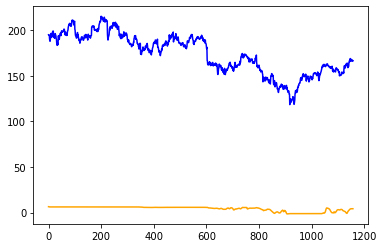

In [10]:
plt.plot(truth, 'b')
plt.plot(predict, 'orange')
plt.savefig(os.path.join(root, "results", date_time, "origin.png"))
plt.show()

In [11]:
predict = np.reshape(predict, (1, -1))
predict = np.squeeze(normalize(np.array(predict)))
truth = np.reshape(truth, (1, -1))
truth = np.squeeze(normalize(np.array(truth)))

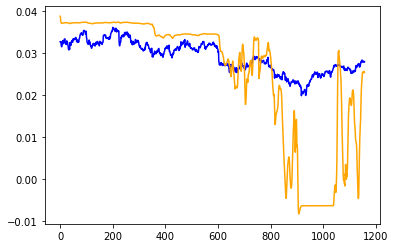

In [12]:
plt.plot(truth, 'b')
plt.plot(predict, 'orange')
plt.savefig(os.path.join(root, "results", date_time, "normalize.png"))
plt.show()